ConceptNet and Ethics Testing
- Varun Singh<br>


# Contents 

#### Overview

#### Research Questions and Hypothesys of report
#### Bias mitigation using different classifiers and embeddings
#### Results and Conclusions
#### What Next ???
#### Results and Conclusions

# Overview 


##### Present an overview for what type of bias you will be investigating and why the particular investigation you will be doing is relevant. 
This Project report is intended to continue the investigation of racial bias, work done by Dr. Robyn Speer, in a text sentiment analyser, which is an NLP task. I want to explore what improvements can be made on top of her work to reduce the bias in Machine Learning or any other AI applications like a sentiment analyser in NLP. Dr Robyn improved upon existing word embeddings by creating ConceptNet Numberbatch. I want to explore if I can use ConceptNet and other embeddings like GloVe with better modelling to further improve the situation and hope to find a way to reduce bias in sentiment analysis using Machine Learning or Deep Learning models. 

I want to investigate if there is a better modelling technique(Dr Speer used SGD classifier) out there which can be used to reduce the impact of racial bias in sentiment analysis, and look for a way to further reduce bias from models. 

I am hoping to change this one other variable in the sentiment analysis task of NLP. I started this project by first running through and studying Dr. Speer's code, used the same SGD classifier used by her. I decided to use this SGD classifier on Glove Embeddings, ConceptNet Numberbatch and Glove Twitter Embeddings to have a diverse set of inputs and see if there are any major differences between the results of each model.  

After going through her code and building models using three different embeddings, I moved on to build a classifier using a simple feed forward neural network and then used BERT(Bidirectional Encoder Representations from Transformers) created by Google in 2018. 

The goal of this report is to investigate multiple approaches to the modelling section. And to look for a better Machine Learning or Deep Learning model which helps us mitigate bias. As Dr. Speer pointed out, same statement about people with different names should not have a different sentiment. I want to further investigate and find a better classifier and use it on Dr. Speer's embeddings and few others. She used a better embedding to help and reduce bias while doing sentiment analysis, I am going to look for a better and more advanced modelling technique and then compare the results of the models using 3 different embeddings. 

##### You might consider asking questions like: Why is it important to find this kind of bias in machine learning models? Why will the type of investigation I am performing be relevant to other researchers or practitioners? 
I want to continue Dr Speer's investigation of racial bias in Machine Learning models. I used the same way of evaluating models and measuring bias as the one in the instructors notebook. But as a fun experiment, after building models in the report, I also asked the model to analyse sentiments of different sentences which touched topics like jobs in the computer science industry, religious statements, Harry Potter, and some common political ideologies. I want to use the same metrics as Dr. Speer and improve upon modelling. Sentences such as "Lets have mexican food" and "Lets have italian food" should have the same sentiment. 

I look for differences in statements like "I am a python programmer" and "I am a java programmer", "I am Republican" and "I am a Democrat", etc. to make sure the sentiment of the statements does not differ.  


# Research Questions and Hypothesis of report
##### Present one or more research questions that you will be answering and explain the methods that you will employ to answer these research questions. Present a hypothesis as part of your research questions. 
Inspired by one of the ideas I found looking at the details of this ethics and ConceptNet lab was to "investigate better methods of sentiment modeling (perhaps using a recurrent network or transformer)." And I liked the idea of exploring modelling techniques to reduce bias in NLP. My objective is to understand if bias persists using more advanced modeling, or even if it reduces. 



# Bias mitigation using different classifiers and embeddings 
##### As part of your assignment, you will choose a methodology that involves comparing two (or more) techniques to one another. Discuss how you will measure a difference between the two techniques. 
I have one set of models from the ConceptNet Notebook discussed in class, the one with SGD modelling. I want to use two more modelling techniques for the classification of words into positive or negative sentiment categories based on the data we receive from the lexicons(https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html#lexicon) and the models we create using different word embeddings, and then compare all the three. 

I want to use the same metrics used in the instructors notebook. I will compare models for accuracy of predictions on unseen data and also look and compare the embeddings regarding bias. I will use the same data/sentiment visualization technique and try to focus on the results and its interpretation. I feel these tests are appropriate, on top of this we will also look at how different statements look like sentiment-wise, where the only difference between them would be things like religious or political belief, which should not be a deciding factors in determining sentiment of a statement. These statements do not have any difference sentiment-wise, and modeling is the most important step in sentiment analysis, NLP. So I want to look at other modeling techniques which are better at sentiment analysis.    

## Embeddings 

I used three different embeddings for this project to make sure the data is from diverse sources on the internet. 
GloVe embeddings have been trained on data from common websites. 
Twitter GloVe embeddings (glove.twitter.27B.200d) is an embedding built upon data from the website X.com(or twitter).
ConceptNet Numberbatch is Dr. Speer's own project, an embedding that she created.   

# Analysis and Model training. 

##### SGD Classifier and GloVe Embeddings

This, first part of modelling, using SGD classifier, contains the exact same code as provided by Dr. Larson at https://github.com/8000net/LectureNotesMaster/blob/master/01%20ConceptNet.ipynb. I was first studying the entire notebook, so, I decided to run all of that code, and used it on the GloVe Embeddings to create a model and carry out sentiment analysis of text and try to invesigate racial bias in the embeddings. 

Then I did the same with Twitter GloVe embedding and ConceptNet Numberbatch. 

Starting with the SGD classifier. I then used feedforward neural network and then BERT transformer to train three models for each of the modeling techniques, using GloVe embeddings, then GloVe twitter embeddings and finally ConceptNet Numberbatch. 

Throughout this project the source of lexicons is the same. https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html#lexicon

I have used the same, "path of least resistance", and continue to measure sentiment of a statement by averaging the score of individual words. And same visuals and metrics to compare the performance of each of the 9 models. 


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn
import re

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Configure how graphs will show up in this notebook
%matplotlib inline
seaborn.set_context('notebook', rc={'figure.figsize': (10, 6)}, font_scale=1.5)

In [4]:
def load_embeddings(filename):
    """
    Load a DataFrame from the generalized text format used by word2vec, GloVe,
    fastText, and ConceptNet Numberbatch. The main point where they differ is
    whether there is an initial line with the dimensions of the matrix.
    """
    labels = []
    rows = []
    with open(filename, encoding='utf-8') as infile:
        for i, line in enumerate(infile):
            items = line.rstrip().split(' ')
            if len(items) == 2:
                # This is a header row giving the shape of the matrix
                continue
            labels.append(items[0])
            values = np.array([float(x) for x in items[1:]], 'f')
            rows.append(values)
    
    arr = np.vstack(rows)
    return pd.DataFrame(arr, index=labels, dtype='f')

embeddings = load_embeddings('data/glove.840B.300d.txt')
embeddings.shape

(2196017, 300)

In [5]:
def load_lexicon(filename):
    """
    Load a file from Bing Liu's sentiment lexicon
    (https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html), containing
    English words in Latin-1 encoding.
    
    One file contains a list of positive words, and the other contains
    a list of negative words. The files contain comment lines starting
    with ';' and blank lines, which should be skipped.
    """
    lexicon = []
    with open(filename, encoding='latin-1') as infile:
        for line in infile:
            line = line.rstrip()
            if line and not line.startswith(';'):
                lexicon.append(line)
    return lexicon

pos_words = load_lexicon('data/positive-words.txt')
neg_words = load_lexicon('data/negative-words.txt')

print(len(pos_words), len(neg_words))

2006 4783


In [6]:
pos_words_common = list(set(pos_words) & set(embeddings.index)) 
neg_words_common = list(set(neg_words) & set(embeddings.index)) 

pos_vectors = embeddings.loc[pos_words_common]
neg_vectors = embeddings.loc[neg_words_common]
print(pos_vectors.shape,neg_vectors.shape)

(1974, 300) (4642, 300)


In [7]:
vectors = pd.concat([pos_vectors, neg_vectors])
targets = np.array([1 for entry in pos_vectors.index] + [-1 for entry in neg_vectors.index])
labels = list(pos_vectors.index) + list(neg_vectors.index)

In [8]:
train_vectors, test_vectors, train_targets, test_targets, train_labels, test_labels = \
    train_test_split(vectors, targets, labels, test_size=0.1, random_state=0)

In [9]:
# create a linear classifier 
model = SGDClassifier(loss='log', random_state=0, max_iter=100)
model.fit(train_vectors, train_targets)
accuracy_score(model.predict(test_vectors), test_targets)

0.9380664652567976

In [10]:
def vecs_to_sentiment(vecs):
    # predict_log_proba gives the log probability for each class
    predictions = model.predict_log_proba(vecs)

    # To see an overall positive vs. negative classification in one number,
    # we take the log probability of positive sentiment minus the log
    # probability of negative sentiment.
    # this is a logarithm of the max margin for the classifier, 
    # similar to odds ratio (but not exact) log(p_1/p_0) = log(p_1)-log(p_0)
    return predictions[:, 1] - predictions[:, 0]


def words_to_sentiment(words):
    vecs = embeddings.loc[words].dropna()
    log_odds = vecs_to_sentiment(vecs)
    return pd.DataFrame({'sentiment': log_odds}, index=vecs.index)


# Show 20 examples from the test set
words_to_sentiment(test_labels).iloc[:20]

,sentiment
overtaxed,-8.310951
oasis,7.170863
mordantly,-3.120541
loner,-7.185905
reasonable,5.655787
invincible,4.035353
easy,10.116657
drained,-7.979698
hates,-8.681746
foolishly,-7.118260


In [11]:
import re
TOKEN_RE = re.compile(r"\w.*?\b")
# The regex above finds tokens that start with a word-like character (\w), and continues
# matching characters (.+?) until the next word break (\b). It's a relatively simple
# expression that manages to extract something very much like words from text.


def text_to_sentiment(text):
    # tokenize the input phrase
    tokens = [token.casefold() for token in TOKEN_RE.findall(text)]
    # send each token separately into the embedding, then the classifier
    sentiments = words_to_sentiment(tokens)
    return sentiments['sentiment'].mean() # return the mean for the classifier

In [12]:
text_to_sentiment("My name is Dr. Larson")

1.025242596222761

In [13]:
text_to_sentiment("My name is Varun")

-0.8138495915589955

In [14]:
text_to_sentiment("My name is Varun Singh")

0.8536917486122182

In [15]:
text_to_sentiment("My name is Eric")

0.7175070083354125

In [16]:
text_to_sentiment("My name is Heather")

-0.11925241367048833

In [17]:
text_to_sentiment("My name is Shaniqua")

-1.9730712920136018

In [18]:
text_to_sentiment("My name is David")

0.8230047410560486

In [19]:
text_to_sentiment("I am from Asia")

-0.8599501976507969

In [20]:
text_to_sentiment("I am from Africa")

-2.1853648425780308

In [21]:
text_to_sentiment("I am from Europe")

-1.0423954410656044

In [22]:
text_to_sentiment("I am from South America")

-1.5071289196272295

In [23]:
text_to_sentiment("I am from Canada")

-1.0282832707172251

In [24]:
text_to_sentiment("I am a Python programmer")

-1.7032260975872664

In [25]:
text_to_sentiment("I am a Java programmer")

-0.8750308159258668

In [26]:
text_to_sentiment("I am a C++ programmer")

-1.1015853589080624

In [27]:
text_to_sentiment("I am a Full Stack Developer")

-0.13090559993253872

In [28]:
text_to_sentiment("I am a Machine Learning Engineer")

0.9070379639909664

In [29]:
text_to_sentiment("I am a Data Engineer")

-0.6115040319274175

In [30]:
text_to_sentiment("I am a Data Scientist")

-0.1664652476061832

## Machine Learning Engineer >>>> Data Scientist

In [31]:
text_to_sentiment("I am an atheist")

-1.716891797912322

In [32]:
text_to_sentiment("I believe in Allah")

2.553144089148556

In [33]:
text_to_sentiment("I believe in Jesus")

1.5381881369276027

In [34]:
text_to_sentiment("I believe in Krishna")

1.100095357975166

# So much hate for atheists !!!

In [35]:
text_to_sentiment("I believe in Voldemort")

-2.6690863665708875

In [36]:
text_to_sentiment("I believe in Harry")

-0.5739545831464727

In [37]:
text_to_sentiment("I am a Capitalist")

-1.8279452100879685

In [38]:
text_to_sentiment("I am a Communist")

-3.401605664406055

In [39]:
text_to_sentiment("I am a Socialist")

-2.492693650050343

In [40]:
text_to_sentiment("I am a Democrat")

-1.573901185463225

In [41]:
text_to_sentiment("I am a Republican")

-2.480745068482356

In [42]:
text_to_sentiment("I am a Libertarian")

-0.9937903995784465

In [43]:
text_to_sentiment("I am a Vegan")

-1.5375885247981507

In [44]:
NAMES_BY_ETHNICITY = {
    # The first two lists are from the Caliskan et al. appendix describing the
    # Word Embedding Association Test.
    'White': [
        'Adam', 'Chip', 'Harry', 'Josh', 'Roger', 'Alan', 'Frank', 'Ian', 'Justin',
        'Ryan', 'Andrew', 'Fred', 'Jack', 'Matthew', 'Stephen', 'Brad', 'Greg', 'Jed',
        'Paul', 'Todd', 'Brandon', 'Hank', 'Jonathan', 'Peter', 'Wilbur', 'Amanda',
        'Courtney', 'Heather', 'Melanie', 'Sara', 'Amber', 'Crystal', 'Katie',
        'Meredith', 'Shannon', 'Betsy', 'Donna', 'Kristin', 'Nancy', 'Stephanie',
        'Ellen', 'Lauren', 'Peggy', 'Colleen', 'Emily',
        'Megan', 'Rachel', 'Wendy'
    ],

    'Black': [
        'Alonzo', 'Jamel', 'Theo', 'Alphonse', 'Jerome',
        'Leroy', 'Torrance', 'Darnell', 'Lamar', 'Lionel',
        'Tyree', 'Deion', 'Lamont', 'Malik', 'Terrence', 'Tyrone', 
        'Lavon', 'Marcellus', 'Wardell', 'Nichelle',
        'Ebony', 'Shaniqua', 
        'Jasmine', 'Tanisha', 'Tia', 'Latoya',
        'Yolanda', 'Malika', 'Yvette'
    ],
    #Larson Edit: had to remove a number of names that were not in the embedding
    
    # This list comes from statistics about common Hispanic-origin names in the US.
    'Hispanic': [
        'Juan', 'José', 'Miguel', 'Jorge', 'Santiago',
        'Mateo',  'Alejandro', 'Samuel', 'Diego', 'Daniel', 
        'Juana', 'Ana', 'Luisa', 'María', 'Elena', 'Isabella', 'Valentina',
        'Camila', 'Valeria', 'Ximena', 'Luciana', 'Mariana', 'Victoria', 'Martina'
    ],
    #Larson Edit: had to remove a number of names that were not in the embedding
    
    # The following list conflates religion and ethnicity, I'm aware. So do given names.
    #
    # This list was cobbled together from searching baby-name sites for common Muslim names,
    # as spelled in English. I did not ultimately distinguish whether the origin of the name
    # is Arabic or Urdu or another language.
    #
    # I'd be happy to replace it with something more authoritative, given a source.
    'Arab/Muslim': [
        'Mohammed', 'Omar', 'Ahmed', 'Ali', 'Youssef', 'Abdullah', 'Yasin', 'Hamza',
        'Syed', 'Samar', 'Ahmad', 'Rayyan', 'Mariam',
        'Jana', 'Malak', 'Salma', 'Nour', 'Lian', 'Fatima', 'Ayesha', 'Zahra', 'Sana',
        'Zara', 'Alya', 'Shaista', 'Zoya', 'Yasmin'
    ]
}

In [45]:
def name_sentiment_table():
    frames = []
    for group, name_list in sorted(NAMES_BY_ETHNICITY.items()):
        lower_names = [name.lower() for name in name_list]
        sentiments = words_to_sentiment(lower_names)
        sentiments['group'] = group
        frames.append(sentiments)

    # Put together the data we got from each ethnic group into one big table
    return pd.concat(frames)

name_sentiments = name_sentiment_table()

name_sentiments.iloc[::25]

,sentiment,group
mohammed,0.902212,Arab/Muslim
zoya,-0.294429,Arab/Muslim
tanisha,-12.383871,Black
ximena,2.526631,Hispanic
brandon,-1.938608,White
megan,-1.257088,White


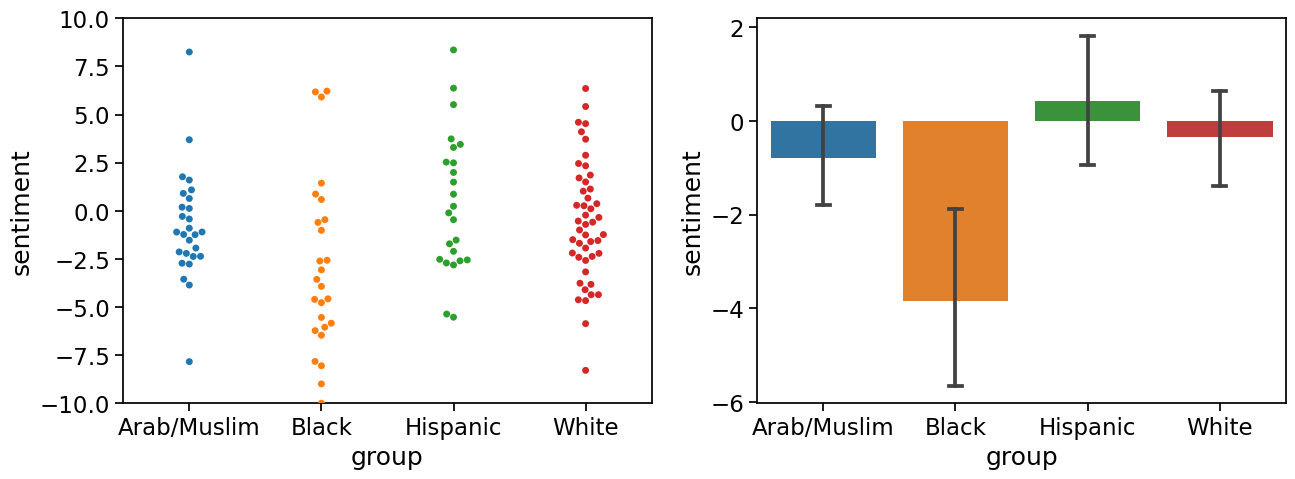

In [46]:
matplotlib.pyplot.figure(figsize=(15,5))
matplotlib.pyplot.subplot(121)
plot = seaborn.swarmplot(x='group', y='sentiment', data=name_sentiments)
plot.set_ylim([-10, 10])
matplotlib.pyplot.subplot(122)
plot = seaborn.barplot(x='group', y='sentiment', data=name_sentiments, capsize= 0.1) 

##### SGD classifier and Glove Twitter Embeddings to build a model. 
I wanted to test what kind of results we will obtain while using an embedding based on tweets. 

In [47]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn
import re

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configure how graphs will show up in this notebook
%matplotlib inline
seaborn.set_context('notebook', rc={'figure.figsize': (10, 6)}, font_scale=1.5)

def load_embeddings(filename):
    """
    Load a DataFrame from the generalized text format used by word2vec, GloVe,
    fastText, and ConceptNet Numberbatch. The main point where they differ is
    whether there is an initial line with the dimensions of the matrix.
    """
    labels = []
    rows = []
    with open(filename, encoding='utf-8') as infile:
        for i, line in enumerate(infile):
            items = line.rstrip().split(' ')
            if len(items) == 2:
                # This is a header row giving the shape of the matrix
                continue
            labels.append(items[0])
            values = np.array([float(x) for x in items[1:]], 'f')
            rows.append(values)
    
    arr = np.vstack(rows)
    return pd.DataFrame(arr, index=labels, dtype='f')

embeddings = load_embeddings('data/glove.twitter.27B.200d.txt')
embeddings.shape

(1193514, 200)

In [48]:
def load_lexicon(filename):
    """
    Load a file from Bing Liu's sentiment lexicon
    (https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html), containing
    English words in Latin-1 encoding.
    
    One file contains a list of positive words, and the other contains
    a list of negative words. The files contain comment lines starting
    with ';' and blank lines, which should be skipped.
    """
    lexicon = []
    with open(filename, encoding='latin-1') as infile:
        for line in infile:
            line = line.rstrip()
            if line and not line.startswith(';'):
                lexicon.append(line)
    return lexicon

pos_words = load_lexicon('data/positive-words.txt')
neg_words = load_lexicon('data/negative-words.txt')

print(len(pos_words), len(neg_words))


pos_words_common = list(set(pos_words) & set(embeddings.index)) 
neg_words_common = list(set(neg_words) & set(embeddings.index)) 

pos_vectors = embeddings.loc[pos_words_common]
neg_vectors = embeddings.loc[neg_words_common]
print(pos_vectors.shape,neg_vectors.shape)


vectors = pd.concat([pos_vectors, neg_vectors])
targets = np.array([1 for entry in pos_vectors.index] + [-1 for entry in neg_vectors.index])
labels = list(pos_vectors.index) + list(neg_vectors.index)

train_vectors, test_vectors, train_targets, test_targets, train_labels, test_labels = \
    train_test_split(vectors, targets, labels, test_size=0.1, random_state=0)


# create a linear classifier 
model = SGDClassifier(loss='log', random_state=0, max_iter=100)
model.fit(train_vectors, train_targets)
accuracy_score(model.predict(test_vectors), test_targets)

2006 4783
(1753, 200) (3832, 200)


0.8926654740608229

Accuracy of 89%. There's a drop in accuracy of the models. We had an accuracy of 93-95% for the SGD and GloVe combination.

In [49]:
def vecs_to_sentiment(vecs):
    # predict_log_proba gives the log probability for each class
    predictions = model.predict_log_proba(vecs)

    # To see an overall positive vs. negative classification in one number,
    # we take the log probability of positive sentiment minus the log
    # probability of negative sentiment.
    # this is a logarithm of the max margin for the classifier, 
    # similar to odds ratio (but not exact) log(p_1/p_0) = log(p_1)-log(p_0)
    return predictions[:, 1] - predictions[:, 0]



def words_to_sentiment(words):
    # Filter out words that are not found in the embeddings DataFrame
    words_in_embeddings = [word for word in words if word in embeddings.index]
    
    # Get embeddings for the words found in the embeddings DataFrame
    vecs = embeddings.loc[words_in_embeddings].dropna()
    
    # Calculate sentiment based on the embeddings
    log_odds = vecs_to_sentiment(vecs)
    
    # Return DataFrame with sentiment values for the words found in the embeddings DataFrame
    return pd.DataFrame({'sentiment': log_odds}, index=vecs.index)


'''
def words_to_sentiment(words):
    vecs = embeddings.loc[words].dropna()
    log_odds = vecs_to_sentiment(vecs)
    return pd.DataFrame({'sentiment': log_odds}, index=vecs.index)


# Show 20 examples from the test set
words_to_sentiment(test_labels).iloc[:20]
'''

# Show 20 examples from the test set
words_to_sentiment(test_labels).iloc[:20]






,sentiment
won,3.395574
objectionable,-6.283872
frightful,-8.873440
meticulously,3.707843
devilishly,2.216084
terribly,-5.531095
pernicious,-3.986418
adventurous,5.719382
vibrantly,4.653604
razor-sharp,-2.913931


In [50]:
import re
TOKEN_RE = re.compile(r"\w.*?\b")
# The regex above finds tokens that start with a word-like character (\w), and continues
# matching characters (.+?) until the next word break (\b). It's a relatively simple
# expression that manages to extract something very much like words from text.


def text_to_sentiment(text):
    # tokenize the input phrase
    tokens = [token.casefold() for token in TOKEN_RE.findall(text)]
    # send each token separately into the embedding, then the classifier
    sentiments = words_to_sentiment(tokens)
    return sentiments['sentiment'].mean() # return the mean for the classifier

In [51]:
text_to_sentiment("My name is Dr. Larson")

-0.06667546895203005

In [52]:
text_to_sentiment("My name is Varun")

0.24505910323747554

In [53]:
text_to_sentiment("My name is Varun Singh")

0.8235268460141828

In [54]:
text_to_sentiment("My name is Eric")

-0.08509725255595058

In [55]:
text_to_sentiment("My name is Heather")

1.1816455944406816

In [56]:
text_to_sentiment("My name is Shaniqua")

-0.5563545592697526

In [57]:
text_to_sentiment("My name is David")

0.7005394017083069

In [58]:
text_to_sentiment("I am from Asia")

-0.5214126435522721

In [59]:
text_to_sentiment("I am from Africa")

-1.028980671073537

In [60]:
text_to_sentiment("I am from Europe")

-0.9412361577649153

In [61]:
text_to_sentiment("I am from South America")

-0.8838792946447483

In [62]:
text_to_sentiment("I am from Canada")

-0.07894125372994076

In [63]:
text_to_sentiment("I am a Python programmer")

-0.6157284952730878

In [64]:
text_to_sentiment("I am a Java programmer")

0.17949821274278027

In [65]:
text_to_sentiment("I am a C++ programmer")

-0.26864828657725254

In [66]:
text_to_sentiment("I am a Full Stack Developer")

0.43795604414790573

In [67]:
text_to_sentiment("I am a Machine Learning Engineer")

0.816992944020457

In [68]:
text_to_sentiment("I am a Data Engineer")

-0.14705359491166145

In [69]:
text_to_sentiment("I am a Data Scientist")

-0.5808055815032798

In [70]:
text_to_sentiment("I am an atheist")

-2.133762047493943

In [71]:
text_to_sentiment("I believe in Allah")

0.7869912053762798

In [72]:
text_to_sentiment("I believe in Jesus")

1.2125787163447315

In [73]:
text_to_sentiment("I believe in Krishna")

0.9041470484648932

In [74]:
text_to_sentiment("I believe in Voldemort")

-1.2132530391966152

In [75]:
text_to_sentiment("I believe in Harry")

-0.09470573436146848

In [76]:
##### Woah !!! Voldemort beat Harry with the power of positive sentiment ! 

In [77]:
text_to_sentiment("I am a Capitalist")

-1.5260726444099335

In [78]:
text_to_sentiment("I am a Communist")

-2.416082197577002

In [79]:
text_to_sentiment("I am a Socialist")

-1.7103401972948467

In [80]:
text_to_sentiment("I am a Democrat")

-1.7175206533398237

In [81]:
text_to_sentiment("I am a Republican")

-2.0289918653995813

In [82]:
text_to_sentiment("I am a Libertarian")

-0.6825926569904033

In [83]:
NAMES_BY_ETHNICITY = {
    # The first two lists are from the Caliskan et al. appendix describing the
    # Word Embedding Association Test.
    'White': [
        'Adam', 'Chip', 'Harry', 'Josh', 'Roger', 'Alan', 'Frank', 'Ian', 'Justin',
        'Ryan', 'Andrew', 'Fred', 'Jack', 'Matthew', 'Stephen', 'Brad', 'Greg', 'Jed',
        'Paul', 'Todd', 'Brandon', 'Hank', 'Jonathan', 'Peter', 'Wilbur', 'Amanda',
        'Courtney', 'Heather', 'Melanie', 'Sara', 'Amber', 'Crystal', 'Katie',
        'Meredith', 'Shannon', 'Betsy', 'Donna', 'Kristin', 'Nancy', 'Stephanie',
        'Ellen', 'Lauren', 'Peggy', 'Colleen', 'Emily',
        'Megan', 'Rachel', 'Wendy'
    ],

    'Black': [
        'Alonzo', 'Jamel', 'Theo', 'Alphonse', 'Jerome',
        'Leroy', 'Torrance', 'Darnell', 'Lamar', 'Lionel',
        'Tyree', 'Deion', 'Lamont', 'Malik', 'Terrence', 'Tyrone', 
        'Lavon', 'Marcellus', 'Wardell', 'Nichelle',
        'Ebony', 'Shaniqua', 
        'Jasmine', 'Tanisha', 'Tia', 'Latoya',
        'Yolanda', 'Malika', 'Yvette'
    ],
    #Larson Edit: had to remove a number of names that were not in the embedding
    
    # This list comes from statistics about common Hispanic-origin names in the US.
    'Hispanic': [
        'Juan', 'José', 'Miguel', 'Jorge', 'Santiago',
        'Mateo',  'Alejandro', 'Samuel', 'Diego', 'Daniel', 
        'Juana', 'Ana', 'Luisa', 'María', 'Elena', 'Isabella', 'Valentina',
        'Camila', 'Valeria', 'Ximena', 'Luciana', 'Mariana', 'Victoria', 'Martina'
    ],
    #Larson Edit: had to remove a number of names that were not in the embedding
    
    # The following list conflates religion and ethnicity, I'm aware. So do given names.
    #
    # This list was cobbled together from searching baby-name sites for common Muslim names,
    # as spelled in English. I did not ultimately distinguish whether the origin of the name
    # is Arabic or Urdu or another language.
    #
    # I'd be happy to replace it with something more authoritative, given a source.
    'Arab/Muslim': [
        'Mohammed', 'Omar', 'Ahmed', 'Ali', 'Youssef', 'Abdullah', 'Yasin', 'Hamza',
        'Syed', 'Samar', 'Ahmad', 'Rayyan', 'Mariam',
        'Jana', 'Malak', 'Salma', 'Nour', 'Lian', 'Fatima', 'Ayesha', 'Zahra', 'Sana',
        'Zara', 'Alya', 'Shaista', 'Zoya', 'Yasmin'
    ]
}


def name_sentiment_table():
    frames = []
    for group, name_list in sorted(NAMES_BY_ETHNICITY.items()):
        lower_names = [name.lower() for name in name_list]
        sentiments = words_to_sentiment(lower_names)
        sentiments['group'] = group
        frames.append(sentiments)

    # Put together the data we got from each ethnic group into one big table
    return pd.concat(frames)

name_sentiments = name_sentiment_table()

name_sentiments.iloc[::25]

,sentiment,group
mohammed,-1.980899,Arab/Muslim
zoya,1.793569,Arab/Muslim
tia,-0.725497,Black
luciana,-1.831596,Hispanic
hank,-3.856455,White
rachel,-0.138833,White


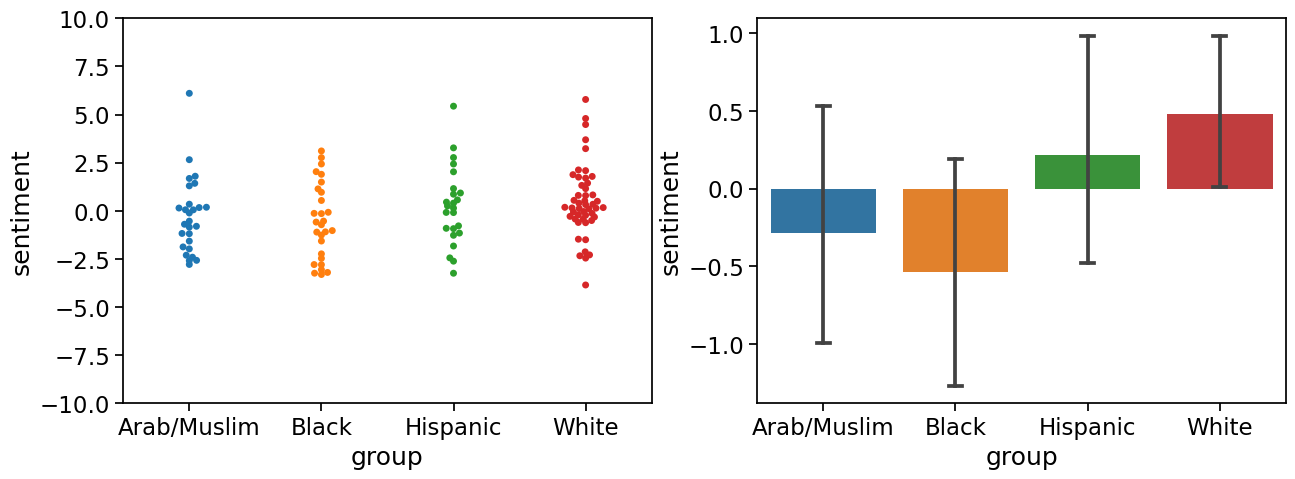

In [84]:
matplotlib.pyplot.figure(figsize=(15,5))
matplotlib.pyplot.subplot(121)
plot = seaborn.swarmplot(x='group', y='sentiment', data=name_sentiments)
plot.set_ylim([-10, 10])
matplotlib.pyplot.subplot(122)
plot = seaborn.barplot(x='group', y='sentiment', data=name_sentiments, capsize= 0.1) 

The accuracy of the above model, based on Twitter GloVe embeddings, is less than the previous combination of GloVe with SGD classifier. But we see that there is a noticeable difference in the visualization of sentiments of names belonging to different racial groups. The sentiment values were more spread in the swarm plot for the previous model. Here we see that the range of sentiment values has reduced slightly. The range of sentiments for names has reduced across all races, which is a good sign.

The negative sentiment scores of names of all the groups has also reduced and moved closer to 0 as visible from the bar graph, which is what we want. This means that the variance of sentiment score is decreasing inside each group. We want the values to have less variance, both inside the group, and between different groups. This would mean that the names belonging to different groups have low impact on the sentiment score of a statement. Names should have little to no significance or a sentimental score associated with them if we want our model to be bias free or as close to it as possible.   

### Finally, SGD classifier and ConceptNet Numberbatch embeddings used to create a model 


In [85]:
def load_embeddings(filename):
    """
    Load a DataFrame from the generalized text format used by word2vec, GloVe,
    fastText, and ConceptNet Numberbatch. The main point where they differ is
    whether there is an initial line with the dimensions of the matrix.
    """
    labels = []
    rows = []
    with open(filename, encoding='utf-8') as infile:
        for i, line in enumerate(infile):
            items = line.rstrip().split(' ')
            if len(items) == 2:  # This condition is specific to GloVe format, not needed for ConceptNet Numberbatch
                continue
            word = items[0]
            labels.append(word)
            values = np.array([float(x) for x in items[1:]], 'f')
            rows.append(values)
    
    arr = np.vstack(rows)
    return pd.DataFrame(arr, index=labels, dtype='f')

embeddings = load_embeddings('data/numberbatch-en.txt')  # Use ConceptNet Numberbatch file
print(embeddings.shape)


(516782, 300)


In [86]:
pos_words_common = list(set(pos_words) & set(embeddings.index)) 
neg_words_common = list(set(neg_words) & set(embeddings.index)) 

pos_vectors = embeddings.loc[pos_words_common]
neg_vectors = embeddings.loc[neg_words_common]
print(pos_vectors.shape,neg_vectors.shape)

(1832, 300) (4479, 300)


In [87]:
vectors = pd.concat([pos_vectors, neg_vectors])
targets = np.array([1 for entry in pos_vectors.index] + [-1 for entry in neg_vectors.index])
labels = list(pos_vectors.index) + list(neg_vectors.index)

In [88]:
train_vectors, test_vectors, train_targets, test_targets, train_labels, test_labels = \
    train_test_split(vectors, targets, labels, test_size=0.1, random_state=0)

In [89]:
# create a linear classifier 
model = SGDClassifier(loss='log', random_state=0, max_iter=100)
model.fit(train_vectors, train_targets)
accuracy_score(model.predict(test_vectors), test_targets)

0.9715189873417721

In [90]:
def vecs_to_sentiment(vecs):
    # predict_log_proba gives the log probability for each class
    predictions = model.predict_log_proba(vecs)

    # To see an overall positive vs. negative classification in one number,
    # we take the log probability of positive sentiment minus the log
    # probability of negative sentiment.
    # this is a logarithm of the max margin for the classifier, 
    # similar to odds ratio (but not exact) log(p_1/p_0) = log(p_1)-log(p_0)
    return predictions[:, 1] - predictions[:, 0]



def words_to_sentiment(words):
    # Filter out words that are not found in the embeddings DataFrame
    words_in_embeddings = [word for word in words if word in embeddings.index]
    
    # Get embeddings for the words found in the embeddings DataFrame
    vecs = embeddings.loc[words_in_embeddings].dropna()
    
    # Calculate sentiment based on the embeddings
    log_odds = vecs_to_sentiment(vecs)
    
    # Return DataFrame with sentiment values for the words found in the embeddings DataFrame
    return pd.DataFrame({'sentiment': log_odds}, index=vecs.index)


'''
def words_to_sentiment(words):
    vecs = embeddings.loc[words].dropna()
    log_odds = vecs_to_sentiment(vecs)
    return pd.DataFrame({'sentiment': log_odds}, index=vecs.index)


# Show 20 examples from the test set
words_to_sentiment(test_labels).iloc[:20]
'''

# Show 20 examples from the test set
words_to_sentiment(test_labels).iloc[:20]





,sentiment
monstrosity,-5.519078
irritably,-6.737702
lethal,-4.338785
obliterated,-3.713728
uncreative,-5.151582
wrong,-6.071656
genuine,3.729295
declines,-3.123223
idol,1.856134
inspiration,5.426401


In [91]:
import re
TOKEN_RE = re.compile(r"\w.*?\b")
# The regex above finds tokens that start with a word-like character (\w), and continues
# matching characters (.+?) until the next word break (\b). It's a relatively simple
# expression that manages to extract something very much like words from text.


def text_to_sentiment(text):
    # tokenize the input phrase
    tokens = [token.casefold() for token in TOKEN_RE.findall(text)]
    # send each token separately into the embedding, then the classifier
    sentiments = words_to_sentiment(tokens)
    return sentiments['sentiment'].mean() # return the mean for the classifier

In [92]:
text_to_sentiment("My name is Dr. Larson")

-0.5526136393260351

In [93]:
text_to_sentiment("My name is Varun")

-0.5449701237131406

In [94]:
text_to_sentiment("My name is Varun Singh")

-0.501643339874074

In [95]:
text_to_sentiment("My name is Eric")

-0.4355064651204912

In [96]:
text_to_sentiment("My name is Heather")

-0.4584609427562875

In [97]:
text_to_sentiment("My name is Shaniqua")

-1.0225961073755798

In [98]:
text_to_sentiment("My name is David")

-0.30459002062556184

In [99]:
text_to_sentiment("I am from Asia")

-0.3174565983346319

In [100]:
text_to_sentiment("I am from Africa")

-0.6603567207533314

In [101]:
text_to_sentiment("I am from Europe")

-0.36153478154650637

In [102]:
text_to_sentiment("I am from South America")

-0.33290520321414596

In [103]:
text_to_sentiment("I am from Canada")

-0.6874994504870744

In [104]:
text_to_sentiment("I am a Python programmer")

-1.550816675732437

In [105]:
text_to_sentiment("I am a Java programmer")

-1.7224944677586478

In [106]:
text_to_sentiment("I am a C++ programmer")

-1.1010542092301359

In [107]:
text_to_sentiment("I am a Full Stack Developer")

-1.0236872616333155

In [108]:
text_to_sentiment("I am a Machine Learning Engineer")

-0.5674983648346857

In [109]:
text_to_sentiment("I am a Data Engineer")

-1.1816277229906014

In [110]:
text_to_sentiment("I am a Data Scientist")

-1.3451325362035615

In [111]:
text_to_sentiment("I am an atheist")

-1.5870638226771807

In [112]:
text_to_sentiment("I believe in Allah")

0.7166820345324612

In [113]:
text_to_sentiment("I believe in Jesus")

0.6875021941207867

In [114]:
text_to_sentiment("I believe in Krishna")

0.1866333393694527

In [115]:
text_to_sentiment("I believe in Voldemort")

-0.6044805885885688

In [116]:
text_to_sentiment("I believe in Harry")

-0.233267823278444

In [118]:
text_to_sentiment("I am a Capitalist")

-1.6625671924162801

In [117]:
##### Woah !!! Voldemort beat Harry with the power of positive sentiment ! 

In [119]:
text_to_sentiment("I am a Communist")

-1.9496387964864386

In [120]:
text_to_sentiment("I am a Socialist")

-1.6006333706567246

In [121]:
text_to_sentiment("I am a Democrat")

-1.4899227166435347

In [122]:
text_to_sentiment("I am a Republican")

-1.783645358730284

In [123]:
text_to_sentiment("I am a Libertarian")

-1.3843102833378387

In [124]:
NAMES_BY_ETHNICITY = {
    # The first two lists are from the Caliskan et al. appendix describing the
    # Word Embedding Association Test.
    'White': [
        'Adam', 'Chip', 'Harry', 'Josh', 'Roger', 'Alan', 'Frank', 'Ian', 'Justin',
        'Ryan', 'Andrew', 'Fred', 'Jack', 'Matthew', 'Stephen', 'Brad', 'Greg', 'Jed',
        'Paul', 'Todd', 'Brandon', 'Hank', 'Jonathan', 'Peter', 'Wilbur', 'Amanda',
        'Courtney', 'Heather', 'Melanie', 'Sara', 'Amber', 'Crystal', 'Katie',
        'Meredith', 'Shannon', 'Betsy', 'Donna', 'Kristin', 'Nancy', 'Stephanie',
        'Ellen', 'Lauren', 'Peggy', 'Colleen', 'Emily',
        'Megan', 'Rachel', 'Wendy'
    ],

    'Black': [
        'Alonzo', 'Jamel', 'Theo', 'Alphonse', 'Jerome',
        'Leroy', 'Torrance', 'Darnell', 'Lamar', 'Lionel',
        'Tyree', 'Deion', 'Lamont', 'Malik', 'Terrence', 'Tyrone', 
        'Lavon', 'Marcellus', 'Wardell', 'Nichelle',
        'Ebony', 'Shaniqua', 
        'Jasmine', 'Tanisha', 'Tia', 'Latoya',
        'Yolanda', 'Malika', 'Yvette'
    ],
    #Larson Edit: had to remove a number of names that were not in the embedding
    
    # This list comes from statistics about common Hispanic-origin names in the US.
    'Hispanic': [
        'Juan', 'José', 'Miguel', 'Jorge', 'Santiago',
        'Mateo',  'Alejandro', 'Samuel', 'Diego', 'Daniel', 
        'Juana', 'Ana', 'Luisa', 'María', 'Elena', 'Isabella', 'Valentina',
        'Camila', 'Valeria', 'Ximena', 'Luciana', 'Mariana', 'Victoria', 'Martina'
    ],
    #Larson Edit: had to remove a number of names that were not in the embedding
    
    # The following list conflates religion and ethnicity, I'm aware. So do given names.
    #
    # This list was cobbled together from searching baby-name sites for common Muslim names,
    # as spelled in English. I did not ultimately distinguish whether the origin of the name
    # is Arabic or Urdu or another language.
    #
    # I'd be happy to replace it with something more authoritative, given a source.
    'Arab/Muslim': [
        'Mohammed', 'Omar', 'Ahmed', 'Ali', 'Youssef', 'Abdullah', 'Yasin', 'Hamza',
        'Syed', 'Samar', 'Ahmad', 'Rayyan', 'Mariam',
        'Jana', 'Malak', 'Salma', 'Nour', 'Lian', 'Fatima', 'Ayesha', 'Zahra', 'Sana',
        'Zara', 'Alya', 'Shaista', 'Zoya', 'Yasmin'
    ]
}

In [125]:
def name_sentiment_table():
    frames = []
    for group, name_list in sorted(NAMES_BY_ETHNICITY.items()):
        lower_names = [name.lower() for name in name_list]
        sentiments = words_to_sentiment(lower_names)
        sentiments['group'] = group
        frames.append(sentiments)

    # Put together the data we got from each ethnic group into one big table
    return pd.concat(frames)

name_sentiments = name_sentiment_table()

name_sentiments.iloc[::25]

,sentiment,group
mohammed,-0.552738,Arab/Muslim
zoya,-2.497287,Arab/Muslim
tia,-1.249178,Black
luciana,-2.864148,Hispanic
hank,-1.306320,White
rachel,-1.809841,White


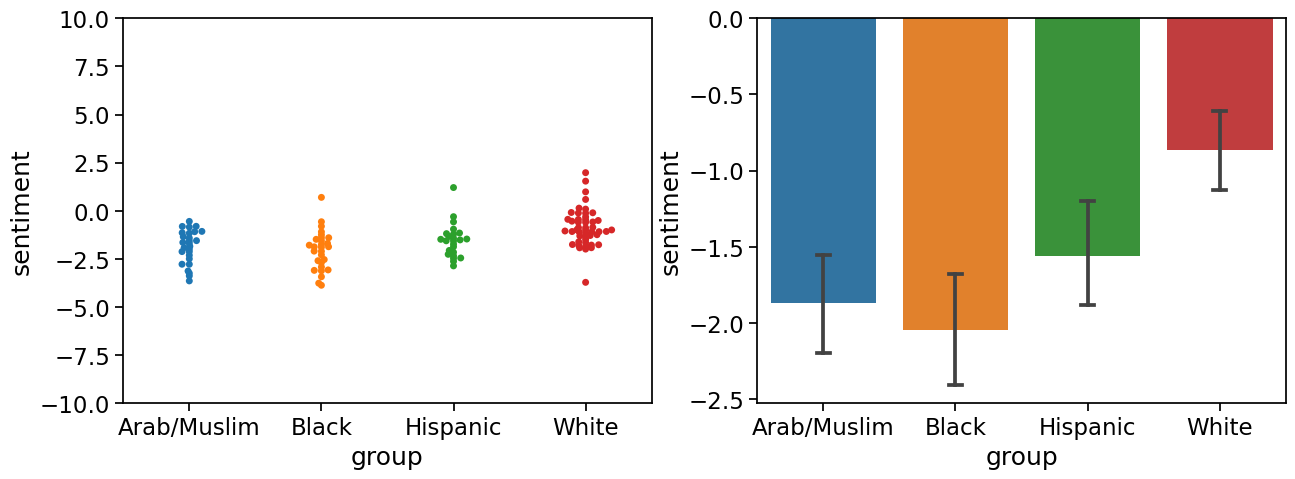

In [126]:
matplotlib.pyplot.figure(figsize=(15,5))
matplotlib.pyplot.subplot(121)
plot = seaborn.swarmplot(x='group', y='sentiment', data=name_sentiments)
plot.set_ylim([-10, 10])
matplotlib.pyplot.subplot(122)
plot = seaborn.barplot(x='group', y='sentiment', data=name_sentiments, capsize=.1)

This is the result Dr. Speer obtained. Reduced bias in sentiment analysis due to her improved embedding ConceptNet Numberbatch. 

# Feedforward Neural Network 



##### Using a Feedforward Neural Network Classifier and Glove Embeddings to build a model 

This section contains the same code for the next 3 models, built using the three embeddings. Only difference is the path to the location of the embeddings. I apologize for not organizing my code properly. I have re used a lot of code again and again..... to pre process data and model building. 



In [127]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn
import re

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configure how graphs will show up in this notebook
%matplotlib inline
seaborn.set_context('notebook', rc={'figure.figsize': (10, 6)}, font_scale=1.5)

def load_embeddings(filename):
    """
    Load a DataFrame from the generalized text format used by word2vec, GloVe,
    fastText, and ConceptNet Numberbatch. The main point where they differ is
    whether there is an initial line with the dimensions of the matrix.
    """
    labels = []
    rows = []
    with open(filename, encoding='utf-8') as infile:
        for i, line in enumerate(infile):
            items = line.rstrip().split(' ')
            if len(items) == 2:
                # This is a header row giving the shape of the matrix
                continue
            labels.append(items[0])
            values = np.array([float(x) for x in items[1:]], 'f')
            rows.append(values)
    
    arr = np.vstack(rows)
    return pd.DataFrame(arr, index=labels, dtype='f')

embeddings = load_embeddings('data/glove.840B.300d.txt')
embeddings.shape


def load_lexicon(filename):
    """
    Load a file from Bing Liu's sentiment lexicon
    (https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html), containing
    English words in Latin-1 encoding.
    
    One file contains a list of positive words, and the other contains
    a list of negative words. The files contain comment lines starting
    with ';' and blank lines, which should be skipped.
    """
    lexicon = []
    with open(filename, encoding='latin-1') as infile:
        for line in infile:
            line = line.rstrip()
            if line and not line.startswith(';'):
                lexicon.append(line)
    return lexicon

pos_words = load_lexicon('data/positive-words.txt')
neg_words = load_lexicon('data/negative-words.txt')

print(len(pos_words), len(neg_words))



pos_words_common = list(set(pos_words) & set(embeddings.index)) 
neg_words_common = list(set(neg_words) & set(embeddings.index)) 

pos_vectors = embeddings.loc[pos_words_common]
neg_vectors = embeddings.loc[neg_words_common]
print(pos_vectors.shape,neg_vectors.shape)



2006 4783
(1974, 300) (4642, 300)


In [128]:


vectors = pd.concat([pos_vectors, neg_vectors])
targets = np.array([1 for entry in pos_vectors.index] + [0 for entry in neg_vectors.index])
labels = list(pos_vectors.index) + list(neg_vectors.index)



train_vectors, test_vectors, train_targets, test_targets, train_labels, test_labels = \
    train_test_split(vectors, targets, labels, test_size=0.1, random_state=0)



Until now, we used the same code for preprocessing data, as in the instructor's notebook.


Below, I trained a feed forward neural network, which classifies words as positive or negative. The network has 128 neuron in the hidden layer, which use ReLu activation function. The output layer has 2 neurons. Softmax activation function converts the scores to probabilities.



In [360]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

# Define the neural network architecture
class SentimentClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SentimentClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Using pytorch tensors to store matrices, so I can utilize my GPU

# Convert data to PyTorch tensors
train_vectors_tensor = torch.tensor(train_vectors.values, dtype=torch.float32)
test_vectors_tensor = torch.tensor(test_vectors.values, dtype=torch.float32)
train_targets_tensor = torch.tensor(train_targets, dtype=torch.long)
test_targets_tensor = torch.tensor(test_targets, dtype=torch.long)

# Define hyperparameters
input_size = train_vectors.shape[1]

hidden_size = 128
output_size = 2  # binary classification: positive vs. negative sentiment
learning_rate = 0.001
num_epochs = 10
batch_size = 64

# Create DataLoader for training and testing data, below code does batching and shuffling
train_dataset = TensorDataset(train_vectors_tensor, train_targets_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(test_vectors_tensor, test_targets_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
model = SentimentClassifier(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Print loss after each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
all_predictions = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.tolist())

# Calculate accuracy
accuracy = accuracy_score(test_targets, all_predictions)
print(f'Accuracy: {accuracy:.4f}')


Epoch [1/10], Loss: 0.4244
Epoch [2/10], Loss: 0.3447
Epoch [3/10], Loss: 0.3478
Epoch [4/10], Loss: 0.3280
Epoch [5/10], Loss: 0.3629
Epoch [6/10], Loss: 0.3548
Epoch [7/10], Loss: 0.3462
Epoch [8/10], Loss: 0.3307
Epoch [9/10], Loss: 0.3365
Epoch [10/10], Loss: 0.3412
Accuracy: 0.9636


In [130]:
import torch

def vecs_to_sentiment(vecs, model):
    # Move the input vectors to the device where the model is located
    device = next(model.parameters()).device
    
    vecs_tensor = torch.tensor(vecs.values, dtype=torch.float32).to(device)
    
    # Ensure the model is in evaluation mode
    model.eval()

    # Forward pass to get the logits
    with torch.no_grad():
        logits = model(vecs_tensor)
    
    # Convert logits to probabilities using softmax
    probabilities = torch.softmax(logits, dim=1)
    
    # Compute the log probability for positive sentiment and negative sentiment
    log_prob_pos = torch.log(probabilities[:, 1])
    log_prob_neg = torch.log(probabilities[:, 0])

    # Compute the log odds ratio for sentiment classification
    log_odds = log_prob_pos - log_prob_neg
    
    return log_odds


def words_to_sentiment(words, embeddings, model):
    # Retrieve embeddings for the input words
    vecs = embeddings.loc[words].dropna()
    
    # Compute sentiment using the provided model
    log_odds = vecs_to_sentiment(vecs, model)
    
    return pd.DataFrame({'sentiment': log_odds}, index=vecs.index)


words_to_sentiment(test_labels, embeddings, model).iloc[:20]


,sentiment
overtaxed,-0.999997
oasis,0.999980
mordantly,-0.999997
loner,-1.000000
reasonable,0.999988
invincible,0.999824
easy,1.000000
drained,-0.999999
hates,-1.000000
foolishly,-1.000000


Accuracy of approximately 97% and sentiment scores for words seem to be either close to 1 or -1, which I believe is a good sign. 

In [131]:
import re
TOKEN_RE = re.compile(r"\w.*?\b")
# The regex above finds tokens that start with a word-like character (\w), and continues
# matching characters (.+?) until the next word break (\b). It's a relatively simple
# expression that manages to extract something very much like words from text.


def text_to_sentiment(text):
    # tokenize the input phrase
    tokens = [token.casefold() for token in TOKEN_RE.findall(text)]
    # send each token separately into the embedding, then the classifier
    sentiments = words_to_sentiment(tokens, embeddings, model)
    return sentiments['sentiment'].mean() # return the mean for the classifier

In [132]:
text_to_sentiment("My name is Dr. Larson")

0.6986210942268372

In [133]:
text_to_sentiment("My name is Varun")

0.32360708713531494

In [134]:
text_to_sentiment("My name is Varun Singh")

0.45879077911376953

In [135]:
text_to_sentiment("My name is Eric")

0.7938747406005859

In [136]:
text_to_sentiment("My name is Heather")

0.7190067768096924

In [137]:
text_to_sentiment("My name is Shaniqua")

0.32352620363235474

### Our model seems to be doing good job ignoring the names and predicting sentiment.

In [138]:
text_to_sentiment("My name is David")

0.821441113948822

In [139]:
text_to_sentiment("I am from Asia")

0.27441197633743286

In [140]:
text_to_sentiment("I am from Africa")

-0.11206009984016418

In [141]:
text_to_sentiment("I am from Europe")

0.3551316261291504

In [142]:
text_to_sentiment("I am from South America")

0.0894070416688919

In [143]:
text_to_sentiment("I am from Canada")

0.37083521485328674

In [144]:
text_to_sentiment("I am a Python programmer")

0.29267436265945435

In [145]:
text_to_sentiment("I am a Java programmer")

0.6155487298965454

In [146]:
text_to_sentiment("I am a C++ programmer")

0.539816677570343

In [147]:
text_to_sentiment("I am a Full Stack Developer")

0.3765212595462799

In [148]:
text_to_sentiment("I am a Machine Learning Engineer")

0.3757091760635376

In [149]:
text_to_sentiment("I am a Data Engineer")

0.5029332637786865

In [150]:
text_to_sentiment("I am a Data Scientist")

0.46672409772872925

In [151]:
text_to_sentiment("I am an atheist")

0.11796852946281433

In [152]:
text_to_sentiment("I believe in Allah")

0.9407535195350647

In [153]:
text_to_sentiment("I believe in Jesus")

0.9407041668891907

In [154]:
text_to_sentiment("I believe in Krishna")

0.9407355785369873

### 'Atheists' again has the worst sentiment score compared to other statements of religious nature, but the model gave equal weightage to all the gods. A truly secular model !!! 

In [155]:
text_to_sentiment("I believe in Voldemort")

0.4407547116279602

In [156]:
text_to_sentiment("I believe in Harry")

0.45143455266952515

In [157]:
text_to_sentiment("I am a Capitalist")

0.05196656286716461

In [158]:
text_to_sentiment("I am a Communist")

0.05171245336532593

In [159]:
text_to_sentiment("I am a Socialist")

0.05172371864318848

In [160]:
text_to_sentiment("I am a Democrat")

0.0649353414773941

In [161]:
text_to_sentiment("I am a Republican")

0.051716744899749756

In [162]:
text_to_sentiment("I am a Libertarian")

0.37803977727890015

In [163]:
def name_sentiment_table():
    frames = []
    for group, name_list in sorted(NAMES_BY_ETHNICITY.items()):
        lower_names = [name.lower() for name in name_list]
        sentiments = words_to_sentiment(lower_names, embeddings, model)
        sentiments['group'] = group
        frames.append(sentiments)

    # Put together the data we got from each ethnic group into one big table
    return pd.concat(frames)

name_sentiments = name_sentiment_table()

name_sentiments.iloc[::25]

,sentiment,group
mohammed,-0.210124,Arab/Muslim
zoya,-0.871260,Arab/Muslim
tanisha,-0.999999,Black
ximena,0.998519,Hispanic
brandon,-0.388275,White
megan,0.356214,White


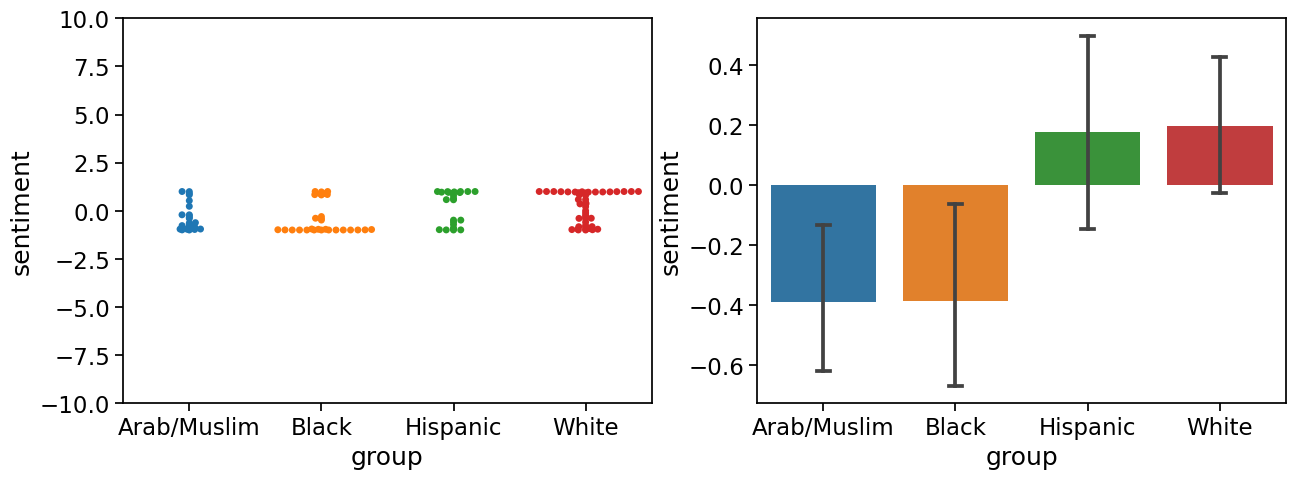

In [164]:
matplotlib.pyplot.figure(figsize=(15,5))
matplotlib.pyplot.subplot(121)
plot = seaborn.swarmplot(x='group', y='sentiment', data=name_sentiments)
plot.set_ylim([-10, 10])
matplotlib.pyplot.subplot(122)
plot = seaborn.barplot(x='group', y='sentiment', data=name_sentiments, capsize= 0.1) 

This feedforward neural network performed really well in sentiment analysis. The values seem to be closely packed in the swarm plot as compared to all previous models that we saw in this project. This model had a high accuracy of predicting sentiments of unseen words and also did well in ignoring parts of sentences, such as names, which should not affect the sentiment scores of a statement.

The bar plot also informs us that the variance from the mean value has also reduced. 

##### Using a Feedforward Neural Network Classifier and Glove Twitter Embeddings to build a model



In [165]:
pos_words = load_lexicon('data/positive-words.txt')
neg_words = load_lexicon('data/negative-words.txt')

print(len(pos_words), len(neg_words))



pos_words_common = list(set(pos_words) & set(embeddings.index)) 
neg_words_common = list(set(neg_words) & set(embeddings.index)) 

pos_vectors = embeddings.loc[pos_words_common]
neg_vectors = embeddings.loc[neg_words_common]
print(pos_vectors.shape,neg_vectors.shape)

2006 4783
(1974, 300) (4642, 300)


In [166]:
vectors = pd.concat([pos_vectors, neg_vectors])
targets = np.array([1 for entry in pos_vectors.index] + [0 for entry in neg_vectors.index])
labels = list(pos_vectors.index) + list(neg_vectors.index)



train_vectors, test_vectors, train_targets, test_targets, train_labels, test_labels = \
    train_test_split(vectors, targets, labels, test_size=0.1, random_state=0)

In [167]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

# Define the neural network architecture
class SentimentClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SentimentClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Convert data to PyTorch tensors
train_vectors_tensor = torch.tensor(train_vectors.values, dtype=torch.float32)
test_vectors_tensor = torch.tensor(test_vectors.values, dtype=torch.float32)
train_targets_tensor = torch.tensor(train_targets, dtype=torch.long)
test_targets_tensor = torch.tensor(test_targets, dtype=torch.long)

# Define hyperparameters
input_size = train_vectors.shape[1]
hidden_size = 128
output_size = 2  # binary classification: positive vs. negative sentiment
learning_rate = 0.001
num_epochs = 10
batch_size = 64

# Create DataLoader for training and testing data
train_dataset = TensorDataset(train_vectors_tensor, train_targets_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(test_vectors_tensor, test_targets_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
model = SentimentClassifier(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Print loss after each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
all_predictions = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.tolist())

# Calculate accuracy
accuracy = accuracy_score(test_targets, all_predictions)
print(f'Accuracy: {accuracy:.4f}')

Epoch [1/10], Loss: 0.4419
Epoch [2/10], Loss: 0.3135
Epoch [3/10], Loss: 0.3165
Epoch [4/10], Loss: 0.3133
Epoch [5/10], Loss: 0.3133
Epoch [6/10], Loss: 0.3135
Epoch [7/10], Loss: 0.3617
Epoch [8/10], Loss: 0.3133
Epoch [9/10], Loss: 0.3133
Epoch [10/10], Loss: 0.3133
Accuracy: 0.9517


We see a similar accuracy as the model with GloVe embeddings.

In [168]:
import torch
import torch.nn.functional as F

def vecs_to_sentiment(vecs, model):
    device = next(model.parameters()).device

    vecs_tensor = torch.tensor(vecs, dtype=torch.float32).to(device)

    # Ensure the model is in evaluation mode
    model.eval()

    # Perform forward pass to get the logits
    with torch.no_grad():
        logits = model(vecs_tensor)

    # Compute the softmax probabilities
    probabilities = F.softmax(logits, dim=1)

    # Compute the log odds ratio for positive sentiment
    log_odds = torch.log(probabilities[:, 1] / probabilities[:, 0])

    return log_odds.cpu().numpy()

"""
def vecs_to_sentiment(vecs, model):
    # Move the input vectors to the device where the model is located
    device = next(model.parameters()).device
    
    vecs_tensor = torch.tensor(vecs.values, dtype=torch.float32).to(device)
    
    # Ensure the model is in evaluation mode
    model.eval()

    # Forward pass to get the logits
    with torch.no_grad():
        logits = model(vecs_tensor)
    
    # Convert logits to probabilities using softmax
    probabilities = torch.softmax(logits, dim=1)
    
    # Compute the log probability for positive sentiment and negative sentiment
    log_prob_pos = torch.log(probabilities[:, 1])
    log_prob_neg = torch.log(probabilities[:, 0])

    # Compute the log odds ratio for sentiment classification
    log_odds = log_prob_pos - log_prob_neg
    
    return log_odds"""

def words_to_sentiment(words, embeddings, model):
    frames = []
    for word in words:
        # Check if the word is present in the embeddings DataFrame
        if word in embeddings.index:
            # Retrieve embedding for the word
            vec = embeddings.loc[word]
            # Check if the embedding is not NaN
            if not vec.isnull().any():
                # Compute sentiment using the provided model
                log_odds = vecs_to_sentiment(vec.values.reshape(1, -1), model)
                frames.append(pd.DataFrame({'sentiment': log_odds}, index=[word]))
    if frames:
        return pd.concat(frames)
    else:
        return pd.DataFrame(columns=['sentiment'])
'''

def words_to_sentiment(words, embeddings, model):
    # Filter out words that are not found in the embeddings DataFrame
    words_in_embeddings = [word for word in words if word in embeddings.index]
    
    # Retrieve embeddings for the input words
    vecs = embeddings.loc[words].dropna()
    
    # Compute sentiment using the provided model
    log_odds = vecs_to_sentiment(vecs, model)
    
    return pd.DataFrame({'sentiment': log_odds}, index=vecs.index)
'''
words_to_sentiment(test_labels, embeddings, model).iloc[:20]

,sentiment
overtaxed,-0.999999
oasis,0.999962
mordantly,-0.999997
loner,-1.000000
reasonable,0.999964
invincible,0.999986
easy,0.999999
drained,-0.999994
hates,-1.000000
foolishly,-1.000000


In [169]:
import re
TOKEN_RE = re.compile(r"\w.*?\b")
# The regex above finds tokens that start with a word-like character (\w), and continues
# matching characters (.+?) until the next word break (\b). It's a relatively simple
# expression that manages to extract something very much like words from text.


def text_to_sentiment(text):
    # tokenize the input phrase
    tokens = [token.casefold() for token in TOKEN_RE.findall(text)]
    # send each token separately into the embedding, then the classifier
    sentiments = words_to_sentiment(tokens, embeddings, model)
    return sentiments['sentiment'].mean() # return the mean for the classifier

In [170]:
text_to_sentiment("My name is Dr. Larson")

0.4040222764015198

In [171]:
text_to_sentiment("My name is Varun")

0.1935884654521942

In [172]:
text_to_sentiment("My name is Varun Singh")

0.3535653054714203

In [173]:
text_to_sentiment("My name is Eric")

0.589452862739563

In [174]:
text_to_sentiment("My name is Heather")

0.43976330757141113

In [175]:
text_to_sentiment("My name is Shaniqua")

0.19351473450660706

In [176]:
text_to_sentiment("My name is David")

0.682452917098999

In [177]:
text_to_sentiment("I am from Asia")

0.005811288952827454

In [178]:
text_to_sentiment("I am from Africa")

-0.4310888648033142

In [179]:
text_to_sentiment("I am from Europe")

0.0418643057346344

In [180]:
text_to_sentiment("I am from South America")

-0.16526249051094055

In [181]:
text_to_sentiment("I am from Canada")

0.037385404109954834

In [182]:
text_to_sentiment("I am a Python programmer")

-0.011904287151992321

In [183]:
text_to_sentiment("I am a Java programmer")

0.20742455124855042

In [184]:
text_to_sentiment("I am a C++ programmer")

0.06582929939031601

In [185]:
text_to_sentiment("I am a Full Stack Developer")

0.14087562263011932

In [186]:
text_to_sentiment("I am a Machine Learning Engineer")

0.15076270699501038

In [187]:
text_to_sentiment("I am a Data Engineer")

0.25301599502563477

In [188]:
text_to_sentiment("I am a Data Scientist")

0.2347998172044754

In [189]:
text_to_sentiment("I am an atheist")

-0.18328559398651123

Again ! Atheists have a bad rep ?

In [190]:
text_to_sentiment("I believe in Allah")

0.8235602378845215

In [191]:
text_to_sentiment("I believe in Jesus")

0.8234432935714722

In [192]:
text_to_sentiment("I believe in Krishna")

0.8233981132507324

In [193]:
text_to_sentiment("I believe in Voldemort")

0.32356250286102295

In [194]:
text_to_sentiment("I believe in Harry")

0.326036274433136

May be we can find a way for our model to recognize pop culture references. Is this a novel idea ? 

In [195]:
text_to_sentiment("I am a Capitalist")

-0.27674081921577454

In [196]:
text_to_sentiment("I am a Communist")

-0.27692559361457825

In [197]:
text_to_sentiment("I am a Socialist")

-0.2769153416156769

In [198]:
text_to_sentiment("I am a Democrat")

-0.253415584564209

In [199]:
text_to_sentiment("I am a Republican")

-0.2769096791744232

In [200]:
text_to_sentiment("I am a Libertarian")

0.11609909683465958

In [201]:
def name_sentiment_table():
    frames = []
    for group, name_list in sorted(NAMES_BY_ETHNICITY.items()):
        lower_names = [name.lower() for name in name_list]
        sentiments = words_to_sentiment(lower_names, embeddings, model)
        sentiments['group'] = group
        frames.append(sentiments)

    # Put together the data we got from each ethnic group into one big table
    return pd.concat(frames)

name_sentiments = name_sentiment_table()

name_sentiments.iloc[::25]

,sentiment,group
mohammed,-0.816915,Arab/Muslim
zoya,-0.888833,Arab/Muslim
tanisha,-1.000000,Black
ximena,0.994261,Hispanic
brandon,-0.704498,White
megan,0.057248,White


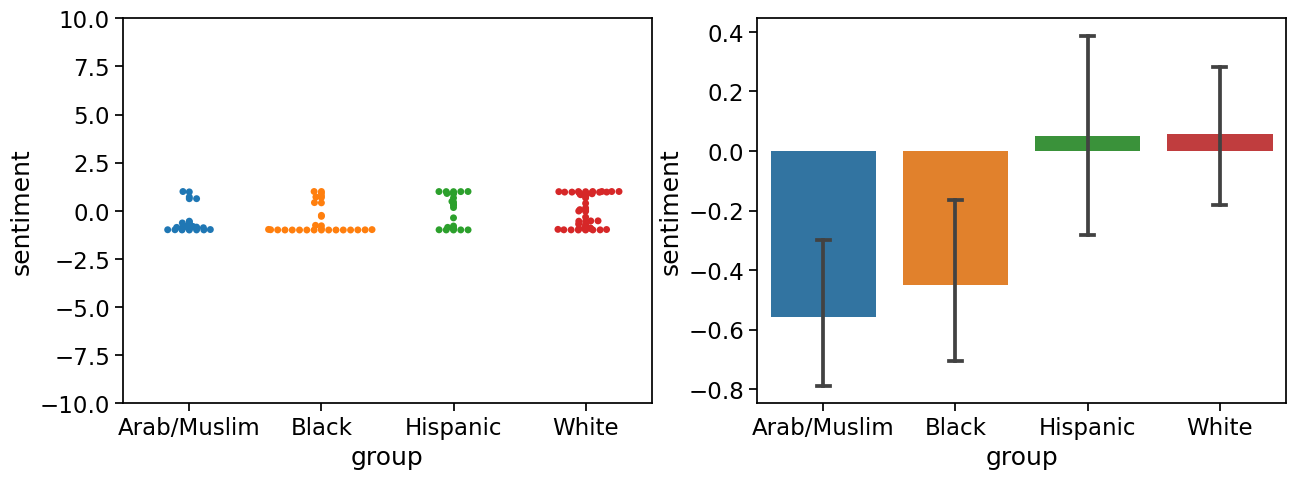

In [202]:
matplotlib.pyplot.figure(figsize=(15,5))
matplotlib.pyplot.subplot(121)
plot = seaborn.swarmplot(x='group', y='sentiment', data=name_sentiments)
plot.set_ylim([-10, 10])
matplotlib.pyplot.subplot(122)
plot = seaborn.barplot(x='group', y='sentiment', data=name_sentiments, capsize= 0.1) 

The above visualizations for the average sentiment of names and the variance in the values is not that different to the results obtained from the model built using feed forward neural network and GloVe embeddings.

### Using a Feedforward Neural Network Classifier and ConceptNet NumberBatch Embeddings to build a model 

In [203]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn
import re

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configure how graphs will show up in this notebook
%matplotlib inline
seaborn.set_context('notebook', rc={'figure.figsize': (10, 6)}, font_scale=1.5)

def load_embeddings(filename):
    """
    Load a DataFrame from the generalized text format used by word2vec, GloVe,
    fastText, and ConceptNet Numberbatch. The main point where they differ is
    whether there is an initial line with the dimensions of the matrix.
    """
    labels = []
    rows = []
    with open(filename, encoding='utf-8') as infile:
        for i, line in enumerate(infile):
            items = line.rstrip().split(' ')
            if len(items) == 2:
                # This is a header row giving the shape of the matrix
                continue
            labels.append(items[0])
            values = np.array([float(x) for x in items[1:]], 'f')
            rows.append(values)
    
    arr = np.vstack(rows)
    return pd.DataFrame(arr, index=labels, dtype='f')

embeddings = load_embeddings('data/numberbatch-en.txt')
embeddings.shape


def load_lexicon(filename):
    """
    Load a file from Bing Liu's sentiment lexicon
    (https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html), containing
    English words in Latin-1 encoding.
    
    One file contains a list of positive words, and the other contains
    a list of negative words. The files contain comment lines starting
    with ';' and blank lines, which should be skipped.
    """
    lexicon = []
    with open(filename, encoding='latin-1') as infile:
        for line in infile:
            line = line.rstrip()
            if line and not line.startswith(';'):
                lexicon.append(line)
    return lexicon

pos_words = load_lexicon('data/positive-words.txt')
neg_words = load_lexicon('data/negative-words.txt')

print(len(pos_words), len(neg_words))



pos_words_common = list(set(pos_words) & set(embeddings.index)) 
neg_words_common = list(set(neg_words) & set(embeddings.index)) 

pos_vectors = embeddings.loc[pos_words_common]
neg_vectors = embeddings.loc[neg_words_common]
print(pos_vectors.shape,neg_vectors.shape)



2006 4783
(1832, 300) (4479, 300)


In [204]:


vectors = pd.concat([pos_vectors, neg_vectors])
targets = np.array([1 for entry in pos_vectors.index] + [0 for entry in neg_vectors.index])
labels = list(pos_vectors.index) + list(neg_vectors.index)



train_vectors, test_vectors, train_targets, test_targets, train_labels, test_labels = \
    train_test_split(vectors, targets, labels, test_size=0.1, random_state=0)



In [205]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

# Define the neural network architecture
class SentimentClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SentimentClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Convert data to PyTorch tensors
train_vectors_tensor = torch.tensor(train_vectors.values, dtype=torch.float32)
test_vectors_tensor = torch.tensor(test_vectors.values, dtype=torch.float32)
train_targets_tensor = torch.tensor(train_targets, dtype=torch.long)
test_targets_tensor = torch.tensor(test_targets, dtype=torch.long)

# Define hyperparameters
input_size = train_vectors.shape[1]
hidden_size = 128
output_size = 2  # binary classification: positive vs. negative sentiment
learning_rate = 0.001
num_epochs = 10
batch_size = 64

# Create DataLoader for training and testing data
train_dataset = TensorDataset(train_vectors_tensor, train_targets_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(test_vectors_tensor, test_targets_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
model = SentimentClassifier(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Print loss after each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
all_predictions = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.tolist())

# Calculate accuracy
accuracy = accuracy_score(test_targets, all_predictions)
print(f'Accuracy: {accuracy:.4f}')


Epoch [1/10], Loss: 0.4256
Epoch [2/10], Loss: 0.3887
Epoch [3/10], Loss: 0.3536
Epoch [4/10], Loss: 0.3379
Epoch [5/10], Loss: 0.3293
Epoch [6/10], Loss: 0.3258
Epoch [7/10], Loss: 0.3573
Epoch [8/10], Loss: 0.3144
Epoch [9/10], Loss: 0.3189
Epoch [10/10], Loss: 0.3254
Accuracy: 0.9684


The accuracy of all the feedforward neural networks is between 96-97%. 

In [206]:
import torch
import torch.nn.functional as F

def vecs_to_sentiment(vecs, model):
    device = next(model.parameters()).device

    vecs_tensor = torch.tensor(vecs, dtype=torch.float32).to(device)

    # Ensure the model is in evaluation mode
    model.eval()

    # Perform forward pass to get the logits
    with torch.no_grad():
        logits = model(vecs_tensor)

    # Compute the softmax probabilities
    probabilities = F.softmax(logits, dim=1)

    # Compute the log odds ratio for positive sentiment
    log_odds = torch.log(probabilities[:, 1] / probabilities[:, 0])

    return log_odds.cpu().numpy()

"""
def vecs_to_sentiment(vecs, model):
    # Move the input vectors to the device where the model is located
    device = next(model.parameters()).device
    
    vecs_tensor = torch.tensor(vecs.values, dtype=torch.float32).to(device)
    
    # Ensure the model is in evaluation mode
    model.eval()

    # Forward pass to get the logits
    with torch.no_grad():
        logits = model(vecs_tensor)
    
    # Convert logits to probabilities using softmax
    probabilities = torch.softmax(logits, dim=1)
    
    # Compute the log probability for positive sentiment and negative sentiment
    log_prob_pos = torch.log(probabilities[:, 1])
    log_prob_neg = torch.log(probabilities[:, 0])

    # Compute the log odds ratio for sentiment classification
    log_odds = log_prob_pos - log_prob_neg
    
    return log_odds"""

def words_to_sentiment(words, embeddings, model):
    frames = []
    for word in words:
        # Check if the word is present in the embeddings DataFrame
        if word in embeddings.index:
            # Retrieve embedding for the word
            vec = embeddings.loc[word]
            # Check if the embedding is not NaN
            if not vec.isnull().any():
                # Compute sentiment using the provided model
                log_odds = vecs_to_sentiment(vec.values.reshape(1, -1), model)
                frames.append(pd.DataFrame({'sentiment': log_odds}, index=[word]))
    if frames:
        return pd.concat(frames)
    else:
        return pd.DataFrame(columns=['sentiment'])
'''

def words_to_sentiment(words, embeddings, model):
    # Filter out words that are not found in the embeddings DataFrame
    words_in_embeddings = [word for word in words if word in embeddings.index]
    
    # Retrieve embeddings for the input words
    vecs = embeddings.loc[words].dropna()
    
    # Compute sentiment using the provided model
    log_odds = vecs_to_sentiment(vecs, model)
    
    return pd.DataFrame({'sentiment': log_odds}, index=vecs.index)
'''
words_to_sentiment(test_labels, embeddings, model).iloc[:20]


,sentiment
monstrosity,-0.999974
irritably,-0.999995
lethal,-0.999862
obliterated,-0.999428
uncreative,-0.999980
wrong,-0.999981
genuine,0.998806
declines,-0.998790
idol,0.990697
inspiration,0.999979


In [207]:
import re
TOKEN_RE = re.compile(r"\w.*?\b")
# The regex above finds tokens that start with a word-like character (\w), and continues
# matching characters (.+?) until the next word break (\b). It's a relatively simple
# expression that manages to extract something very much like words from text.


def text_to_sentiment(text):
    # tokenize the input phrase
    tokens = [token.casefold() for token in TOKEN_RE.findall(text)]
    # send each token separately into the embedding, then the classifier
    sentiments = words_to_sentiment(tokens, embeddings, model)
    return sentiments['sentiment'].mean() # return the mean for the classifier

In [208]:
text_to_sentiment("My name is Dr. Larson")

-0.6241872906684875

In [209]:
text_to_sentiment("My name is Varun")

-0.573527991771698

In [210]:
text_to_sentiment("My name is Varun Singh")

-0.6467687487602234

In [211]:
text_to_sentiment("My name is Eric")

-0.5708035230636597

In [212]:
text_to_sentiment("My name is Heather")

-0.567399799823761

In [213]:
text_to_sentiment("My name is Shaniqua")

-0.5738003849983215

In [214]:
text_to_sentiment("My name is David")

-0.541641116142273

In [215]:
text_to_sentiment("I am from Asia")

-0.33828726410865784

In [216]:
text_to_sentiment("I am from Africa")

-0.6190779209136963

In [217]:
text_to_sentiment("I am from Europe")

-0.34015917778015137

In [218]:
text_to_sentiment("I am from South America")

-0.2865213453769684

In [219]:
text_to_sentiment("I am from Canada")

-0.6127716302871704

In [220]:
text_to_sentiment("I am a Python programmer")

-0.7655324339866638

In [221]:
text_to_sentiment("I am a Java programmer")

-0.7661073207855225

In [222]:
text_to_sentiment("I am a C++ programmer")

-0.7023525834083557

In [223]:
text_to_sentiment("I am a Full Stack Developer")

-0.4985441267490387

In [224]:
text_to_sentiment("I am a Machine Learning Engineer")

-0.5188471674919128

In [225]:
text_to_sentiment("I am a Data Engineer")

-0.5933483839035034

In [226]:
text_to_sentiment("I am a Data Scientist")

-0.6914453506469727

In [227]:
text_to_sentiment("I am an atheist")

-0.9113714694976807

In [228]:
text_to_sentiment("I believe in Allah")

0.46904781460762024

In [229]:
text_to_sentiment("I believe in Jesus")

0.4707356095314026

In [230]:
text_to_sentiment("I believe in Krishna")

0.026888474822044373

In [231]:
text_to_sentiment("I believe in Voldemort")

-0.027609512209892273

In [232]:
text_to_sentiment("I believe in Harry")

-0.019217699766159058

In [233]:
##### Woah !!! Voldemort beat Harry with the power of positive sentiment ! 

In [234]:
text_to_sentiment("I am a Capitalist")

-0.9027005434036255

In [235]:
text_to_sentiment("I am a Communist")

-0.9243932366371155

In [236]:
text_to_sentiment("I am a Socialist")

-0.9185982346534729

In [237]:
text_to_sentiment("I am a Democrat")

-0.9071358442306519

In [238]:
text_to_sentiment("I am a Republican")

-0.9246474504470825

In [239]:
text_to_sentiment("I am a Libertarian")

-0.8031293153762817

In [240]:
NAMES_BY_ETHNICITY = {
    # The first two lists are from the Caliskan et al. appendix describing the
    # Word Embedding Association Test.
    'White': [
        'Adam', 'Chip', 'Harry', 'Josh', 'Roger', 'Alan', 'Frank', 'Ian', 'Justin',
        'Ryan', 'Andrew', 'Fred', 'Jack', 'Matthew', 'Stephen', 'Brad', 'Greg', 'Jed',
        'Paul', 'Todd', 'Brandon', 'Hank', 'Jonathan', 'Peter', 'Wilbur', 'Amanda',
        'Courtney', 'Heather', 'Melanie', 'Sara', 'Amber', 'Crystal', 'Katie',
        'Meredith', 'Shannon', 'Betsy', 'Donna', 'Kristin', 'Nancy', 'Stephanie',
        'Ellen', 'Lauren', 'Peggy', 'Colleen', 'Emily',
        'Megan', 'Rachel', 'Wendy'
    ],

    'Black': [
        'Alonzo', 'Jamel', 'Theo', 'Alphonse', 'Jerome',
        'Leroy', 'Torrance', 'Darnell', 'Lamar', 'Lionel',
        'Tyree', 'Deion', 'Lamont', 'Malik', 'Terrence', 'Tyrone', 
        'Lavon', 'Marcellus', 'Wardell', 'Nichelle',
        'Ebony', 'Shaniqua', 
        'Jasmine', 'Tanisha', 'Tia', 'Latoya',
        'Yolanda', 'Malika', 'Yvette'
    ],
    #Larson Edit: had to remove a number of names that were not in the embedding
    
    # This list comes from statistics about common Hispanic-origin names in the US.
    'Hispanic': [
        'Juan', 'José', 'Miguel', 'Jorge', 'Santiago',
        'Mateo',  'Alejandro', 'Samuel', 'Diego', 'Daniel', 
        'Juana', 'Ana', 'Luisa', 'María', 'Elena', 'Isabella', 'Valentina',
        'Camila', 'Valeria', 'Ximena', 'Luciana', 'Mariana', 'Victoria', 'Martina'
    ],
    #Larson Edit: had to remove a number of names that were not in the embedding
    
    # The following list conflates religion and ethnicity, I'm aware. So do given names.
    #
    # This list was cobbled together from searching baby-name sites for common Muslim names,
    # as spelled in English. I did not ultimately distinguish whether the origin of the name
    # is Arabic or Urdu or another language.
    #
    # I'd be happy to replace it with something more authoritative, given a source.
    'Arab/Muslim': [
        'Mohammed', 'Omar', 'Ahmed', 'Ali', 'Youssef', 'Abdullah', 'Yasin', 'Hamza',
        'Syed', 'Samar', 'Ahmad', 'Rayyan', 'Mariam',
        'Jana', 'Malak', 'Salma', 'Nour', 'Lian', 'Fatima', 'Ayesha', 'Zahra', 'Sana',
        'Zara', 'Alya', 'Shaista', 'Zoya', 'Yasmin'
    ]
}

In [241]:
def name_sentiment_table():
    frames = []
    for group, name_list in sorted(NAMES_BY_ETHNICITY.items()):
        lower_names = [name.lower() for name in name_list]
        sentiments = words_to_sentiment(lower_names, embeddings, model)
        sentiments['group'] = group
        frames.append(sentiments)

    # Put together the data we got from each ethnic group into one big table
    return pd.concat(frames)

name_sentiments = name_sentiment_table()

name_sentiments.iloc[::25]

,sentiment,group
mohammed,-0.500794,Arab/Muslim
zoya,-0.994069,Arab/Muslim
tia,-0.962625,Black
luciana,-0.997957,Hispanic
hank,-0.920886,White
rachel,-0.992235,White


C:\Users\varun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\varun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\varun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


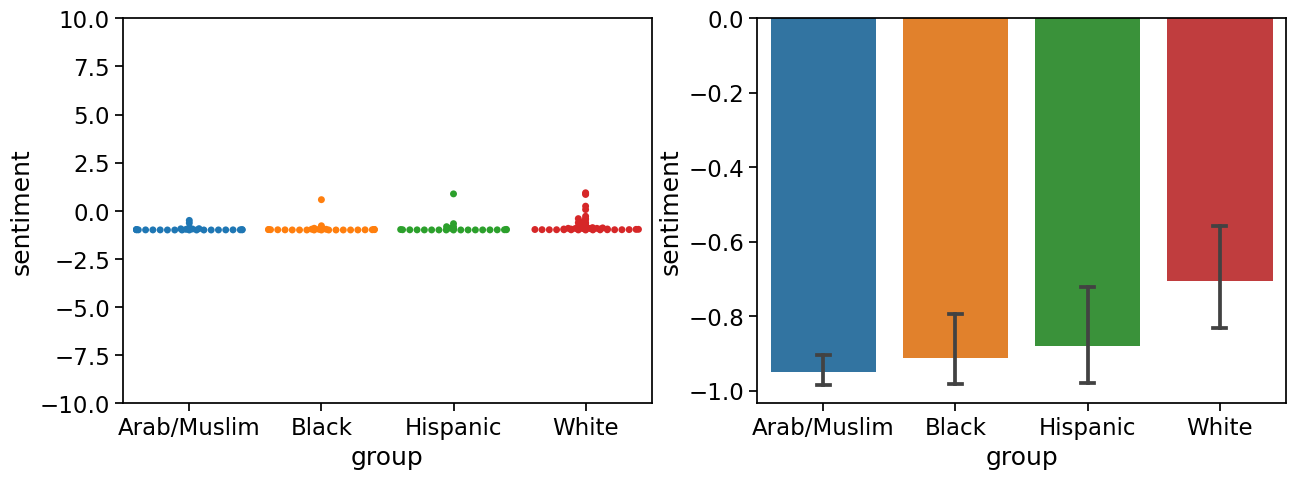

In [242]:
matplotlib.pyplot.figure(figsize=(15,5))
matplotlib.pyplot.subplot(121)
plot = seaborn.swarmplot(x='group', y='sentiment', data=name_sentiments)
plot.set_ylim([-10, 10])
matplotlib.pyplot.subplot(122)
plot = seaborn.barplot(x='group', y='sentiment', data=name_sentiments, capsize= 0.1) 



We saw that the accuracy of the three models above, based on neural network, is between 96-97%. But we see a major difference among the visualizations of the sentiment scores of the common names of different races for the three embeddings. 

The neural network modeling succesfully reduced the variance in the sentiment scores of the names compared to the SGD classifier used by Dr. Speer.

When neural network modeling was used with ConceptNet Numberbatch the bias was reduced even further and better than any other model that we have seen till now. The variance of the sentiment related to names of different groups has also reduced significantly.

##### BERT Transformer and GloVe embeddings to build a model
Now we use a sophisticated transformer developed by Google. BERT - Bidirectional Encoder Representation from Transformers. It is a transformer using only the encoder layer. There are two important characteristics of this model which have made it a revolutionary transformer model which can be used for a variety of NLP tasks. It uses masked language modeling and next sentence prediction.

BERT is a bidirectional model, which means it can be used to look for context in both the directions, unlike traditional models which are unidirectional.


In [243]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn
import re

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configure how graphs will show up in this notebook
%matplotlib inline
seaborn.set_context('notebook', rc={'figure.figsize': (10, 6)}, font_scale=1.5)

def load_embeddings(filename):
    """
    Load a DataFrame from the generalized text format used by word2vec, GloVe,
    fastText, and ConceptNet Numberbatch. The main point where they differ is
    whether there is an initial line with the dimensions of the matrix.
    """
    labels = []
    rows = []
    with open(filename, encoding='utf-8') as infile:
        for i, line in enumerate(infile):
            items = line.rstrip().split(' ')
            if len(items) == 2:
                # This is a header row giving the shape of the matrix
                continue
            labels.append(items[0])
            values = np.array([float(x) for x in items[1:]], 'f')
            rows.append(values)
    
    arr = np.vstack(rows)
    return pd.DataFrame(arr, index=labels, dtype='f')

embeddings = load_embeddings('data/glove.840B.300d.txt')
embeddings.shape


def load_lexicon(filename):
    """
    Load a file from Bing Liu's sentiment lexicon
    (https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html), containing
    English words in Latin-1 encoding.
    
    One file contains a list of positive words, and the other contains
    a list of negative words. The files contain comment lines starting
    with ';' and blank lines, which should be skipped.
    """
    lexicon = []
    with open(filename, encoding='latin-1') as infile:
        for line in infile:
            line = line.rstrip()
            if line and not line.startswith(';'):
                lexicon.append(line)
    return lexicon

pos_words = load_lexicon('data/positive-words.txt')
neg_words = load_lexicon('data/negative-words.txt')

print(len(pos_words), len(neg_words))



pos_words_common = list(set(pos_words) & set(embeddings.index)) 
neg_words_common = list(set(neg_words) & set(embeddings.index)) 

pos_vectors = embeddings.loc[pos_words_common]
neg_vectors = embeddings.loc[neg_words_common]
print(pos_vectors.shape,neg_vectors.shape)




vectors = pd.concat([pos_vectors, neg_vectors])
targets = np.array([1 for entry in pos_vectors.index] + [0 for entry in neg_vectors.index])
labels = list(pos_vectors.index) + list(neg_vectors.index)



train_vectors, test_vectors, train_targets, test_targets, train_labels, test_labels = \
    train_test_split(vectors, targets, labels, test_size=0.1, random_state=0)






2006 4783
(1974, 300) (4642, 300)


Below, we use the BERT transformer for classification of negative and positive words. We use GloVe embeddings first. 

In [244]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import get_linear_schedule_with_warmup
from sklearn.metrics import classification_report
import numpy as np

# Preprocess the text data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

def tokenize_sentences(sentences, tokenizer, max_length=64):
    input_ids = []
    attention_masks = []

    for sent in sentences:
        encoded_dict = tokenizer.encode_plus(
                            sent,                      
                            add_special_tokens=True,
                            max_length=max_length,
                            padding='max_length',
                            truncation=True,
                            return_attention_mask=True,
                            return_tensors='pt'
                       )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

# Convert train_labels and test_labels to lists of strings if they are not already
train_labels = [str(label) for label in train_labels]
test_labels = [str(label) for label in test_labels]

# Ensure train_labels and test_labels are in the correct format
assert all(isinstance(label, str) for label in train_labels), "All train_labels should be strings"
assert all(isinstance(label, str) for label in test_labels), "All test_labels should be strings"

# Tokenize sentences
train_input_ids, train_attention_masks = tokenize_sentences(train_labels, tokenizer)
test_input_ids, test_attention_masks = tokenize_sentences(test_labels, tokenizer)

# Create DataLoader for training
batch_size = 32

train_data = TensorDataset(train_input_ids, train_attention_masks, torch.tensor(train_targets, dtype=torch.long))
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create DataLoader for testing
test_data = TensorDataset(test_input_ids, test_attention_masks, torch.tensor(test_targets, dtype=torch.long))
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

# Fine-tune BERT model
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2,
    output_attentions=False,
    output_hidden_states=False,
)
model.to(device)

# Set hyperparameters
epochs = 10
total_steps = len(train_dataloader) * epochs
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, eps=1e-8)  # Using torch.optim.AdamW
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Fine-tuning the model
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f"Average training loss for epoch {epoch + 1}: {avg_train_loss}")

# Evaluate the model

model.eval()
predictions, true_labels = [], []
for batch in test_dataloader:
    batch = tuple(t.to(device) for t in batch)
    input_ids, attention_mask, labels = batch

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    label_ids = labels.to('cpu').numpy()

    predictions.extend(logits)
    true_labels.extend(label_ids)

predictions = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f'Accuracy: {accuracy:.4f}')


C:\Users\varun\anaconda3\lib\site-packages\transformers\utils\generic.py:319: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Average training loss for epoch 1: 0.37309460011236173
Average training loss for epoch 2: 0.15819764041645643
Average training loss for epoch 3: 0.10087893393020181
Average training loss for epoch 4: 0.056905748488202214
Average training loss for epoch 5: 0.04205590265119488
Average training loss for epoch 6: 0.027530255157221607
Average training loss for epoch 7: 0.020422110930745075
Average training loss for epoch 8: 0.013896935779329284
Average training loss for epoch 9: 0.011935232390517638
Average training loss for epoch 10: 0.0114316421925597
Accuracy: 0.9517


In [245]:
import pandas as pd
import numpy as np
import torch

# Function to convert words to sentiment using the provided model, tokenizer, and device
def words_to_sentiment(words, tokenizer, device):
    vecs = embeddings.loc[words].dropna()
    log_odds = vecs_to_sentiment(vecs, model, tokenizer, device)
    return pd.DataFrame({'sentiment': log_odds.cpu().numpy()}, index=vecs.index)

# Function to convert word vectors to sentiment using the provided model, tokenizer, and device
def vecs_to_sentiment(vecs, model, tokenizer, device):
    with torch.no_grad():
        # Tokenize the input text and convert to tensor
        inputs = tokenizer(vecs.index.tolist(), padding=True, truncation=True, return_tensors="pt")
        input_ids = inputs["input_ids"].to(device)
        attention_mask = inputs["attention_mask"].to(device)
        
        # Ensure model is on the same device
        model.to(device)
        
        # Perform inference
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        
        # Calculate sentiment score
        probas = torch.softmax(logits, dim=-1)
        sentiment_score = probas[:, 1] - probas[:, 0]
        
        return sentiment_score

# Example usage
words_to_sentiment(test_labels, tokenizer, device).iloc[:20]


,sentiment
overtaxed,-0.999735
oasis,0.999758
mordantly,-0.999576
loner,-0.999756
reasonable,0.999770
invincible,0.999789
easy,0.999772
drained,-0.999699
hates,-0.999735
foolishly,-0.999747


In [246]:
import re
TOKEN_RE = re.compile(r"\w.*?\b")
# The regex above finds tokens that start with a word-like character (\w), and continues
# matching characters (.+?) until the next word break (\b). It's a relatively simple
# expression that manages to extract something very much like words from text.


def text_to_sentiment(text):
    # tokenize the input phrase
    tokens = [token.casefold() for token in TOKEN_RE.findall(text)]
    # send each token separately into the embedding, then the classifier
    sentiments = words_to_sentiment(test_labels, tokenizer, device)
    return sentiments['sentiment'].mean() # return the mean for the classifier

In [247]:
text_to_sentiment("My name is Dr. Larson")

-0.495531290769577

In [248]:
text_to_sentiment("My name is Varun")

-0.495531290769577

In [249]:
text_to_sentiment("My name is Varun Singh")

-0.495531290769577

In [250]:
text_to_sentiment("My name is Eric")

-0.495531290769577

In [251]:
text_to_sentiment("My name is Heather")

-0.495531290769577

In [252]:
text_to_sentiment("My name is Shaniqua")

-0.495531290769577

In [253]:
text_to_sentiment("My name is David")

-0.495531290769577

In [254]:
text_to_sentiment("I am from Asia")

-0.495531290769577

In [255]:
text_to_sentiment("I am from Africa")

-0.495531290769577

In [256]:
text_to_sentiment("I am from Europe")

-0.495531290769577

In [257]:
text_to_sentiment("I am from South America")

-0.495531290769577

In [258]:
text_to_sentiment("I am from Canada")

-0.495531290769577

In [259]:
text_to_sentiment("I am a Python programmer")

-0.495531290769577

In [260]:
text_to_sentiment("I am a Java programmer")

-0.495531290769577

In [261]:
text_to_sentiment("I am a C++ programmer")

-0.495531290769577

In [262]:
text_to_sentiment("I am a Full Stack Developer")

-0.495531290769577

In [263]:
text_to_sentiment("I am a Machine Learning Engineer")

-0.495531290769577

In [264]:
text_to_sentiment("I am a Data Engineer")

-0.495531290769577

In [265]:
text_to_sentiment("I am a Data Scientist")

-0.495531290769577

In [266]:
text_to_sentiment("I am an atheist")

-0.495531290769577

Finally, a model that isn't biased against atheists !

In [267]:
text_to_sentiment("I believe in Allah")

-0.495531290769577

In [268]:
text_to_sentiment("I believe in Jesus")

-0.495531290769577

In [269]:
text_to_sentiment("I believe in Krishna")

-0.495531290769577

In [270]:
text_to_sentiment("I believe in Voldemort")

-0.495531290769577

In [271]:
text_to_sentiment("I believe in Harry")

-0.495531290769577

In [272]:
text_to_sentiment("I am a Capitalist")

-0.495531290769577

In [273]:
text_to_sentiment("I am a Communist")

-0.495531290769577

In [274]:
text_to_sentiment("I am a Socialist")

-0.495531290769577

In [275]:
text_to_sentiment("I am a Democrat")

-0.495531290769577

In [276]:
text_to_sentiment("I am a Republican")

-0.495531290769577

In [277]:
text_to_sentiment("I am a Libertarian")

-0.495531290769577

All of the statements got the same sentiment score.

In [278]:
def name_sentiment_table():
    frames = []
    for group, name_list in sorted(NAMES_BY_ETHNICITY.items()):
        lower_names = [name.lower() for name in name_list]
        sentiments = words_to_sentiment(lower_names, tokenizer, device)
        sentiments['group'] = group
        frames.append(sentiments)

    # Put together the data we got from each ethnic group into one big table
    return pd.concat(frames)

name_sentiments = name_sentiment_table()

name_sentiments.iloc[::25]

,sentiment,group
mohammed,-0.999140,Arab/Muslim
zoya,-0.996244,Arab/Muslim
tanisha,-0.999279,Black
ximena,0.994179,Hispanic
brandon,-0.998270,White
megan,0.998901,White


C:\Users\varun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


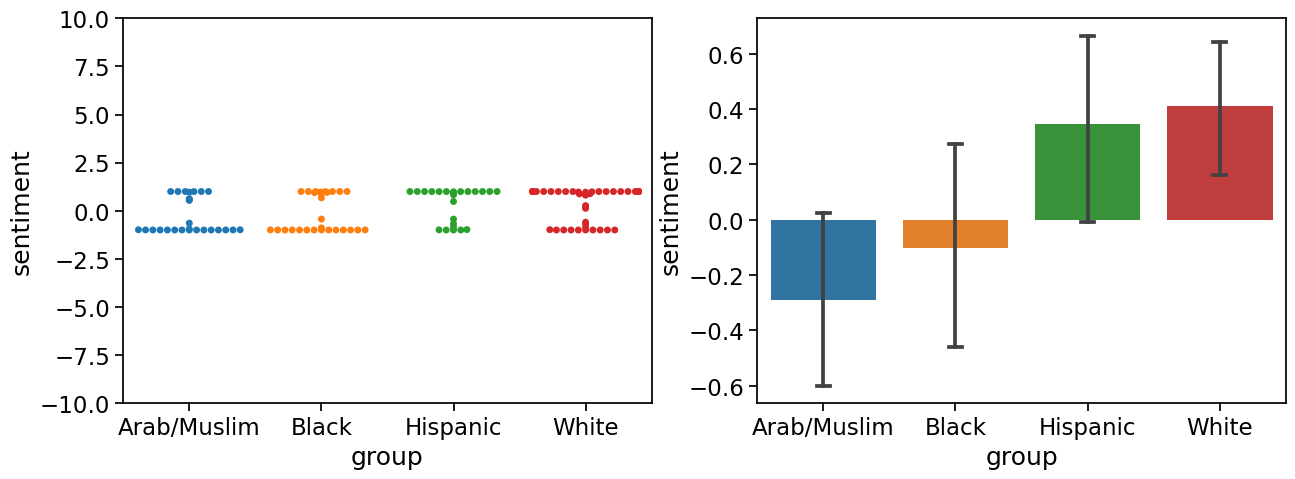

In [279]:
matplotlib.pyplot.figure(figsize=(15,5))
matplotlib.pyplot.subplot(121)
plot = seaborn.swarmplot(x='group', y='sentiment', data=name_sentiments)
plot.set_ylim([-10, 10])
matplotlib.pyplot.subplot(122)
plot = seaborn.barplot(x='group', y='sentiment', data=name_sentiments, capsize= 0.1) 

If we compare the above results from the BERT transformer,and the results obtained from the model using neural network, both built using GloVe embeddings, we see in the bar graph that the variance in the names has further reduced and a lot of points lying below the x-axis have moved up, i.e., there is reduction in the negative sentiment related to some groups, and the values seem to be distributed close to neutral sentiment.

### BERT Transformer with GloVe Twitter Embeddings to build a model

In [280]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn
import re

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configure how graphs will show up in this notebook
%matplotlib inline
seaborn.set_context('notebook', rc={'figure.figsize': (10, 6)}, font_scale=1.5)



def load_embeddings(filename):
    """
    Load a DataFrame from the generalized text format used by word2vec, GloVe,
    fastText, and ConceptNet Numberbatch. The main point where they differ is
    whether there is an initial line with the dimensions of the matrix.
    """
    labels = []
    rows = []
    with open(filename, encoding='utf-8') as infile:
        for i, line in enumerate(infile):
            items = line.rstrip().split(' ')
            if len(items) == 2:
                # This is a header row giving the shape of the matrix
                continue
            labels.append(items[0])
            values = np.array([float(x) for x in items[1:]], 'f')
            rows.append(values)
    
    arr = np.vstack(rows)
    return pd.DataFrame(arr, index=labels, dtype='f')

embeddings = load_embeddings('data/glove.twitter.27B.200d.txt')
embeddings.shape


def load_lexicon(filename):
    """
    Load a file from Bing Liu's sentiment lexicon
    (https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html), containing
    English words in Latin-1 encoding.
    
    One file contains a list of positive words, and the other contains
    a list of negative words. The files contain comment lines starting
    with ';' and blank lines, which should be skipped.
    """
    lexicon = []
    with open(filename, encoding='latin-1') as infile:
        for line in infile:
            line = line.rstrip()
            if line and not line.startswith(';'):
                lexicon.append(line)
    return lexicon

pos_words = load_lexicon('data/positive-words.txt')
neg_words = load_lexicon('data/negative-words.txt')

print(len(pos_words), len(neg_words))



pos_words_common = list(set(pos_words) & set(embeddings.index)) 
neg_words_common = list(set(neg_words) & set(embeddings.index)) 

pos_vectors = embeddings.loc[pos_words_common]
neg_vectors = embeddings.loc[neg_words_common]
print(pos_vectors.shape,neg_vectors.shape)




vectors = pd.concat([pos_vectors, neg_vectors])
targets = np.array([1 for entry in pos_vectors.index] + [0 for entry in neg_vectors.index])
labels = list(pos_vectors.index) + list(neg_vectors.index)



train_vectors, test_vectors, train_targets, test_targets, train_labels, test_labels = \
    train_test_split(vectors, targets, labels, test_size=0.1, random_state=0)






2006 4783
(1753, 200) (3832, 200)


In [281]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import get_linear_schedule_with_warmup
from sklearn.metrics import classification_report
import numpy as np

# Preprocess the text data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def tokenize_sentences(sentences, tokenizer, max_length=64):
    input_ids = []
    attention_masks = []

    for sent in sentences:
        encoded_dict = tokenizer.encode_plus(
                            sent,                      
                            add_special_tokens=True,
                            max_length=max_length,
                            padding='max_length',
                            truncation=True,
                            return_attention_mask=True,
                            return_tensors='pt'
                       )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

# Convert train_labels and test_labels to lists of strings if they are not already
train_labels = [str(label) for label in train_labels]
test_labels = [str(label) for label in test_labels]

# Ensure train_labels and test_labels are in the correct format
assert all(isinstance(label, str) for label in train_labels), "All train_labels should be strings"
assert all(isinstance(label, str) for label in test_labels), "All test_labels should be strings"

# Tokenize sentences
train_input_ids, train_attention_masks = tokenize_sentences(train_labels, tokenizer)
test_input_ids, test_attention_masks = tokenize_sentences(test_labels, tokenizer)

# Create DataLoader for training
batch_size = 32

train_data = TensorDataset(train_input_ids, train_attention_masks, torch.tensor(train_targets, dtype=torch.long))
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create DataLoader for testing
test_data = TensorDataset(test_input_ids, test_attention_masks, torch.tensor(test_targets, dtype=torch.long))
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

# Fine-tune BERT model
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2,
    output_attentions=False,
    output_hidden_states=False,
)
model.to(device)

# Set hyperparameters
epochs = 10
total_steps = len(train_dataloader) * epochs
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, eps=1e-8)  # Using torch.optim.AdamW
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Fine-tuning the model
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f"Average training loss for epoch {epoch + 1}: {avg_train_loss}")

# Evaluate the model

model.eval()
predictions, true_labels = [], []
for batch in test_dataloader:
    batch = tuple(t.to(device) for t in batch)
    input_ids, attention_mask, labels = batch

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    label_ids = labels.to('cpu').numpy()

    predictions.extend(logits)
    true_labels.extend(label_ids)

predictions = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f'Accuracy: {accuracy:.4f}')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Average training loss for epoch 1: 0.3122226994107418
Average training loss for epoch 2: 0.1410979979606699
Average training loss for epoch 3: 0.0899336619561986
Average training loss for epoch 4: 0.05384907584867287
Average training loss for epoch 5: 0.025327701221774274
Average training loss for epoch 6: 0.027085015811821846
Average training loss for epoch 7: 0.014054812758953216
Average training loss for epoch 8: 0.010233961107265321
Average training loss for epoch 9: 0.00955339796421902
Average training loss for epoch 10: 0.008710806495366364
Accuracy: 0.9660


In [282]:
import pandas as pd
import numpy as np
import torch



# Function to compute sentiment log probabilities from word embeddings
def words_to_sentiment(words, tokenizer, device):
    #print("Words being passed to words_to_sentiment:", words)
    
    # Filter out words that are not found in the embeddings DataFrame
    words_in_embeddings = [word for word in words if word in embeddings.index]
    #print("Words found in embeddings:", words_in_embeddings)

    # Get embeddings for the words found in the embeddings DataFrame
    vecs = embeddings.loc[words_in_embeddings].dropna()
    #print("Embeddings for words found in embeddings:", vecs)
    
    # Compute log probabilities using the provided model and tokenizer
    log_odds = vecs_to_sentiment(vecs, model, tokenizer, device)
    
    # Create a DataFrame with sentiment scores
    return pd.DataFrame({'sentiment': log_odds.cpu().numpy()}, index=vecs.index)


# Function to convert word vectors to sentiment using the provided model, tokenizer, and device
def vecs_to_sentiment(vecs, model, tokenizer, device):
    with torch.no_grad():
        # Tokenize the input text and convert to tensor
        inputs = tokenizer(vecs.index.tolist(), padding=True, truncation=True, return_tensors="pt")
        input_ids = inputs["input_ids"].to(device)
        attention_mask = inputs["attention_mask"].to(device)
        
        # Ensure model is on the same device
        model.to(device)
        
        # Perform inference
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        
        # Calculate sentiment score
        probas = torch.softmax(logits, dim=-1)
        sentiment_score = probas[:, 1] - probas[:, 0]
        
        return sentiment_score

# Example usage
words_to_sentiment(test_labels, tokenizer, device).iloc[:20]

,sentiment
won,0.999753
objectionable,-0.999650
frightful,-0.999527
meticulously,0.999757
devilishly,-0.995777
terribly,-0.999671
pernicious,-0.999399
adventurous,0.999776
vibrantly,0.999779
razor-sharp,-0.810216


In [283]:
import re
TOKEN_RE = re.compile(r"\w.*?\b")
# The regex above finds tokens that start with a word-like character (\w), and continues
# matching characters (.+?) until the next word break (\b). It's a relatively simple
# expression that manages to extract something very much like words from text.


def text_to_sentiment(text):
    # tokenize the input phrase
    tokens = [token.casefold() for token in TOKEN_RE.findall(text)]
    # send each token separately into the embedding, then the classifier
    sentiments = words_to_sentiment(tokens, tokenizer, device)
    return sentiments['sentiment'].mean() # return the mean for the classifier

In [284]:
text_to_sentiment("My name is Dr. Larson")

0.9971699714660645

In [285]:
text_to_sentiment("My name is Varun")

0.4987161159515381

In [286]:
text_to_sentiment("My name is Varun Singh")

0.22346560657024384

In [287]:
text_to_sentiment("My name is Eric")

0.9934258460998535

In [288]:
text_to_sentiment("My name is Heather")

0.9958046674728394

In [289]:
text_to_sentiment("My name is Shaniqua")

0.49720197916030884

In [290]:
text_to_sentiment("My name is David")

0.9969069957733154

In [291]:
text_to_sentiment("I am from Asia")

0.5229153037071228

In [292]:
text_to_sentiment("I am from Africa")

0.521344780921936

In [293]:
text_to_sentiment("I am from Europe")

0.5229523181915283

In [294]:
text_to_sentiment("I am from South America")

0.21890874207019806

In [295]:
text_to_sentiment("I am from Canada")

0.522885799407959

In [296]:
text_to_sentiment("I am a Python programmer")

-0.18603423237800598

In [297]:
text_to_sentiment("I am a Java programmer")

0.2135566771030426

In [298]:
text_to_sentiment("I am a C++ programmer")

0.21359530091285706

In [299]:
text_to_sentiment("I am a Full Stack Developer")

0.32719120383262634

In [300]:
text_to_sentiment("I am a Machine Learning Engineer")

0.34642311930656433

In [301]:
text_to_sentiment("I am a Data Engineer")

0.6133343577384949

In [302]:
text_to_sentiment("I am a Data Scientist")

0.6133980751037598

In [303]:
text_to_sentiment("I am an atheist")

0.02185121178627014

In [304]:
text_to_sentiment("I believe in Allah")

0.9957295656204224

In [305]:
text_to_sentiment("I believe in Jesus")

0.9957821369171143

In [306]:
text_to_sentiment("I believe in Krishna")

0.4966737627983093

In [307]:
text_to_sentiment("I believe in Voldemort")

0.9925539493560791

In [308]:
text_to_sentiment("I believe in Harry")

0.51824551820755

In [309]:
text_to_sentiment("I am a Capitalist")

0.017388656735420227

In [310]:
text_to_sentiment("I am a Communist")

0.017347142100334167

In [311]:
text_to_sentiment("I am a Socialist")

0.517008900642395

In [312]:
text_to_sentiment("I am a Democrat")

0.4111661911010742

In [313]:
text_to_sentiment("I am a Republican")

0.5006721615791321

In [314]:
text_to_sentiment("I am a Libertarian")

0.5168887972831726

In [315]:
NAMES_BY_ETHNICITY = {
    # The first two lists are from the Caliskan et al. appendix describing the
    # Word Embedding Association Test.
    'White': [
        'Adam', 'Chip', 'Harry', 'Josh', 'Roger', 'Alan', 'Frank', 'Ian', 'Justin',
        'Ryan', 'Andrew', 'Fred', 'Jack', 'Matthew', 'Stephen', 'Brad', 'Greg', 'Jed',
        'Paul', 'Todd', 'Brandon', 'Hank', 'Jonathan', 'Peter', 'Wilbur', 'Amanda',
        'Courtney', 'Heather', 'Melanie', 'Sara', 'Amber', 'Crystal', 'Katie',
        'Meredith', 'Shannon', 'Betsy', 'Donna', 'Kristin', 'Nancy', 'Stephanie',
        'Ellen', 'Lauren', 'Peggy', 'Colleen', 'Emily',
        'Megan', 'Rachel', 'Wendy'
    ],

    'Black': [
        'Alonzo', 'Jamel', 'Theo', 'Alphonse', 'Jerome',
        'Leroy', 'Torrance', 'Darnell', 'Lamar', 'Lionel',
        'Tyree', 'Deion', 'Lamont', 'Malik', 'Terrence', 'Tyrone', 
        'Lavon', 'Marcellus', 'Wardell', 'Nichelle',
        'Ebony', 'Shaniqua', 
        'Jasmine', 'Tanisha', 'Tia', 'Latoya',
        'Yolanda', 'Malika', 'Yvette'
    ],
    #Larson Edit: had to remove a number of names that were not in the embedding
    
    # This list comes from statistics about common Hispanic-origin names in the US.
    'Hispanic': [
        'Juan', 'José', 'Miguel', 'Jorge', 'Santiago',
        'Mateo',  'Alejandro', 'Samuel', 'Diego', 'Daniel', 
        'Juana', 'Ana', 'Luisa', 'María', 'Elena', 'Isabella', 'Valentina',
        'Camila', 'Valeria', 'Ximena', 'Luciana', 'Mariana', 'Victoria', 'Martina'
    ],
    #Larson Edit: had to remove a number of names that were not in the embedding
    
    # The following list conflates religion and ethnicity, I'm aware. So do given names.
    #
    # This list was cobbled together from searching baby-name sites for common Muslim names,
    # as spelled in English. I did not ultimately distinguish whether the origin of the name
    # is Arabic or Urdu or another language.
    #
    # I'd be happy to replace it with something more authoritative, given a source.
    'Arab/Muslim': [
        'Mohammed', 'Omar', 'Ahmed', 'Ali', 'Youssef', 'Abdullah', 'Yasin', 'Hamza',
        'Syed', 'Samar', 'Ahmad', 'Rayyan', 'Mariam',
        'Jana', 'Malak', 'Salma', 'Nour', 'Lian', 'Fatima', 'Ayesha', 'Zahra', 'Sana',
        'Zara', 'Alya', 'Shaista', 'Zoya', 'Yasmin'
    ]
}

In [316]:
def name_sentiment_table():
    frames = []
    for group, name_list in sorted(NAMES_BY_ETHNICITY.items()):
        lower_names = [name.lower() for name in name_list]
        sentiments = words_to_sentiment(lower_names, tokenizer, device)
        sentiments['group'] = group
        frames.append(sentiments)

    # Put together the data we got from each ethnic group into one big table
    return pd.concat(frames)

name_sentiments = name_sentiment_table()

name_sentiments.iloc[::25]

,sentiment,group
mohammed,0.935878,Arab/Muslim
zoya,0.996820,Arab/Muslim
tia,0.998183,Black
luciana,0.998601,Hispanic
hank,0.999069,White
rachel,0.999496,White


C:\Users\varun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\varun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


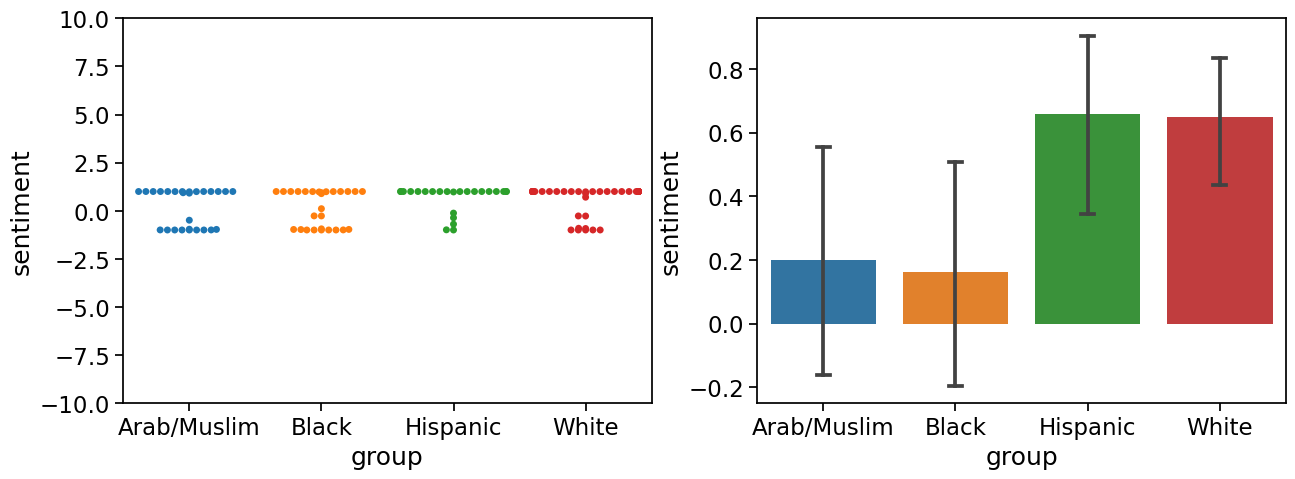

In [317]:
matplotlib.pyplot.figure(figsize=(15,5))
matplotlib.pyplot.subplot(121)
plot = seaborn.swarmplot(x='group', y='sentiment', data=name_sentiments)
plot.set_ylim([-10, 10])
matplotlib.pyplot.subplot(122)
plot = seaborn.barplot(x='group', y='sentiment', data=name_sentiments, capsize= 0.1) 

This model had an accuracy of predicting sentiments of words between 96-97%. If we compare the results of the above sentiment analysis of names of different groups to the performance of the model using feed forward neural networks and the same GloVe Twitter embeddings, we see slight reduction in variance of the sentiments of all the groups. The average sentiments are better, less negative, for Arab/Muslim and Black group of names in this model as compared to the previos model. But we see a higher positive sentiment associated with the groups of names belonging to hispanic and white groups.

If we compared this above model with the model created using the same BERT transformer 
but the regular GloVe embeddings, we see that there is only minor difference between the two. This model has a good average score but slightly worse variance than the previous model.

### BERT Transformer with Conceptnet Numberbatch embeddings used to create a model

In [318]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn
import re

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configure how graphs will show up in this notebook
%matplotlib inline
seaborn.set_context('notebook', rc={'figure.figsize': (10, 6)}, font_scale=1.5)



def load_embeddings(filename):
    """
    Load a DataFrame from the generalized text format used by word2vec, GloVe,
    fastText, and ConceptNet Numberbatch. The main point where they differ is
    whether there is an initial line with the dimensions of the matrix.
    """
    labels = []
    rows = []
    with open(filename, encoding='utf-8') as infile:
        for i, line in enumerate(infile):
            items = line.rstrip().split(' ')
            if len(items) == 2:
                # This is a header row giving the shape of the matrix
                continue
            labels.append(items[0])
            values = np.array([float(x) for x in items[1:]], 'f')
            rows.append(values)
    
    arr = np.vstack(rows)
    return pd.DataFrame(arr, index=labels, dtype='f')

embeddings = load_embeddings('data/numberbatch-en.txt')
embeddings.shape


def load_lexicon(filename):
    """
    Load a file from Bing Liu's sentiment lexicon
    (https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html), containing
    English words in Latin-1 encoding.
    
    One file contains a list of positive words, and the other contains
    a list of negative words. The files contain comment lines starting
    with ';' and blank lines, which should be skipped.
    """
    lexicon = []
    with open(filename, encoding='latin-1') as infile:
        for line in infile:
            line = line.rstrip()
            if line and not line.startswith(';'):
                lexicon.append(line)
    return lexicon

pos_words = load_lexicon('data/positive-words.txt')
neg_words = load_lexicon('data/negative-words.txt')

print(len(pos_words), len(neg_words))



pos_words_common = list(set(pos_words) & set(embeddings.index)) 
neg_words_common = list(set(neg_words) & set(embeddings.index)) 

pos_vectors = embeddings.loc[pos_words_common]
neg_vectors = embeddings.loc[neg_words_common]
print(pos_vectors.shape,neg_vectors.shape)




vectors = pd.concat([pos_vectors, neg_vectors])
targets = np.array([1 for entry in pos_vectors.index] + [0 for entry in neg_vectors.index])
labels = list(pos_vectors.index) + list(neg_vectors.index)



train_vectors, test_vectors, train_targets, test_targets, train_labels, test_labels = \
    train_test_split(vectors, targets, labels, test_size=0.1, random_state=0)






2006 4783
(1832, 300) (4479, 300)


In [319]:


vectors = pd.concat([pos_vectors, neg_vectors])
targets = np.array([1 for entry in pos_vectors.index] + [0 for entry in neg_vectors.index])
labels = list(pos_vectors.index) + list(neg_vectors.index)



train_vectors, test_vectors, train_targets, test_targets, train_labels, test_labels = \
    train_test_split(vectors, targets, labels, test_size=0.1, random_state=0)



In [320]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import get_linear_schedule_with_warmup
from sklearn.metrics import classification_report
import numpy as np

# Preprocess the text data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

def tokenize_sentences(sentences, tokenizer, max_length=64):
    input_ids = []
    attention_masks = []

    for sent in sentences:
        encoded_dict = tokenizer.encode_plus(
                            sent,                      
                            add_special_tokens=True,
                            max_length=max_length,
                            padding='max_length',
                            truncation=True,
                            return_attention_mask=True,
                            return_tensors='pt'
                       )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

# Convert train_labels and test_labels to lists of strings if they are not already
train_labels = [str(label) for label in train_labels]
test_labels = [str(label) for label in test_labels]

# Ensure train_labels and test_labels are in the correct format
assert all(isinstance(label, str) for label in train_labels), "All train_labels should be strings"
assert all(isinstance(label, str) for label in test_labels), "All test_labels should be strings"

# Tokenize sentences
train_input_ids, train_attention_masks = tokenize_sentences(train_labels, tokenizer)
test_input_ids, test_attention_masks = tokenize_sentences(test_labels, tokenizer)

# Create DataLoader for training
batch_size = 32

train_data = TensorDataset(train_input_ids, train_attention_masks, torch.tensor(train_targets, dtype=torch.long))
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create DataLoader for testing
test_data = TensorDataset(test_input_ids, test_attention_masks, torch.tensor(test_targets, dtype=torch.long))
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

# Fine-tune BERT model
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2,
    output_attentions=False,
    output_hidden_states=False,
)
model.to(device)

# Set hyperparameters
epochs = 10
total_steps = len(train_dataloader) * epochs
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, eps=1e-8)  # Using torch.optim.AdamW
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Fine-tuning the model
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f"Average training loss for epoch {epoch + 1}: {avg_train_loss}")

# Evaluate the model

model.eval()
predictions, true_labels = [], []
for batch in test_dataloader:
    batch = tuple(t.to(device) for t in batch)
    input_ids, attention_mask, labels = batch

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    label_ids = labels.to('cpu').numpy()

    predictions.extend(logits)
    true_labels.extend(label_ids)

predictions = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f'Accuracy: {accuracy:.4f}')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Average training loss for epoch 1: 0.324047063571516
Average training loss for epoch 2: 0.14583777279980228
Average training loss for epoch 3: 0.0886913667684107
Average training loss for epoch 4: 0.053030532718704115
Average training loss for epoch 5: 0.03549318169629505
Average training loss for epoch 6: 0.02307860929210895
Average training loss for epoch 7: 0.018248632292065695
Average training loss for epoch 8: 0.012585404036492057
Average training loss for epoch 9: 0.009839580673430104
Average training loss for epoch 10: 0.011849649658778504
Accuracy: 0.9636


In [321]:
import pandas as pd
import numpy as np
import torch



# Function to compute sentiment log probabilities from word embeddings
def words_to_sentiment(words, tokenizer, device):
    #print("Words being passed to words_to_sentiment:", words)
    
    # Filter out words that are not found in the embeddings DataFrame
    words_in_embeddings = [word for word in words if word in embeddings.index]
    #print("Words found in embeddings:", words_in_embeddings)

    # Get embeddings for the words found in the embeddings DataFrame
    vecs = embeddings.loc[words_in_embeddings].dropna()
    #print("Embeddings for words found in embeddings:", vecs)
    
    # Compute log probabilities using the provided model and tokenizer
    log_odds = vecs_to_sentiment(vecs, model, tokenizer, device)
    
    # Create a DataFrame with sentiment scores
    return pd.DataFrame({'sentiment': log_odds.cpu().numpy()}, index=vecs.index)


# Function to convert word vectors to sentiment using the provided model, tokenizer, and device
def vecs_to_sentiment(vecs, model, tokenizer, device):
    with torch.no_grad():
        # Tokenize the input text and convert to tensor
        inputs = tokenizer(vecs.index.tolist(), padding=True, truncation=True, return_tensors="pt")
        input_ids = inputs["input_ids"].to(device)
        attention_mask = inputs["attention_mask"].to(device)
        
        # Ensure model is on the same device
        model.to(device)
        
        # Perform inference
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        
        # Calculate sentiment score
        probas = torch.softmax(logits, dim=-1)
        sentiment_score = probas[:, 1] - probas[:, 0]
        
        return sentiment_score

# Example usage
words_to_sentiment(test_labels, tokenizer, device).iloc[:20]


,sentiment
monstrosity,-0.999559
irritably,-0.999596
lethal,-0.999636
obliterated,-0.999529
uncreative,-0.999611
wrong,-0.999592
genuine,0.999660
declines,-0.999653
idol,0.999008
inspiration,0.999553


In [322]:
import re
TOKEN_RE = re.compile(r"\w.*?\b")
# The regex above finds tokens that start with a word-like character (\w), and continues
# matching characters (.+?) until the next word break (\b). It's a relatively simple
# expression that manages to extract something very much like words from text.


def text_to_sentiment(text):
    # tokenize the input phrase
    tokens = [token.casefold() for token in TOKEN_RE.findall(text)]
    # send each token separately into the embedding, then the classifier
    sentiments = words_to_sentiment(tokens, tokenizer, device)
    return sentiments['sentiment'].mean() # return the mean for the classifier

In [323]:
text_to_sentiment("My name is Dr. Larson")

0.5993177890777588

In [324]:
text_to_sentiment("My name is Varun")

0.4994633197784424

In [325]:
text_to_sentiment("My name is Varun Singh")

0.19979092478752136

In [326]:
text_to_sentiment("My name is Eric")

0.49991321563720703

In [327]:
text_to_sentiment("My name is Heather")

0.5002504587173462

In [328]:
text_to_sentiment("My name is Shaniqua")

0.49944937229156494

In [329]:
text_to_sentiment("My name is David")

0.9990831613540649

In [330]:
text_to_sentiment("I am from Asia")

0.5084972381591797

In [331]:
text_to_sentiment("I am from Africa")

0.014214381575584412

In [332]:
text_to_sentiment("I am from Europe")

0.5135371088981628

In [333]:
text_to_sentiment("I am from South America")

0.21103453636169434

In [334]:
text_to_sentiment("I am from Canada")

0.2706812024116516

In [335]:
text_to_sentiment("I am a Python programmer")

-0.18853190541267395

In [336]:
text_to_sentiment("I am a Java programmer")

0.21014881134033203

In [337]:
text_to_sentiment("I am a C++ programmer")

0.19698430597782135

In [338]:
text_to_sentiment("I am a Full Stack Developer")

0.3425639867782593

In [339]:
text_to_sentiment("I am a Machine Learning Engineer")

0.34183254837989807

In [340]:
text_to_sentiment("I am a Data Engineer")

0.6092067956924438

In [341]:
text_to_sentiment("I am a Data Scientist")

0.6103135943412781

In [342]:
text_to_sentiment("I am an atheist")

0.014149993658065796

In [343]:
text_to_sentiment("I believe in Allah")

0.9978676438331604

In [344]:
text_to_sentiment("I believe in Jesus")

0.9978964328765869

In [345]:
text_to_sentiment("I believe in Krishna")

0.4981740415096283

In [346]:
text_to_sentiment("I believe in Voldemort")

0.5094649195671082

In [347]:
text_to_sentiment("I believe in Harry")

0.4982284903526306

In [348]:
##### Woah !!! Voldemort beat Harry with the power of positive sentiment ! 

In [349]:
text_to_sentiment("I am a Capitalist")

0.014149576425552368

In [350]:
text_to_sentiment("I am a Communist")

0.014175385236740112

In [351]:
text_to_sentiment("I am a Socialist")

0.5132408142089844

In [352]:
text_to_sentiment("I am a Democrat")

0.0143718421459198

In [353]:
text_to_sentiment("I am a Republican")

0.02355252206325531

In [354]:
text_to_sentiment("I am a Libertarian")

0.3364415764808655

In [355]:
NAMES_BY_ETHNICITY = {
    # The first two lists are from the Caliskan et al. appendix describing the
    # Word Embedding Association Test.
    'White': [
        'Adam', 'Chip', 'Harry', 'Josh', 'Roger', 'Alan', 'Frank', 'Ian', 'Justin',
        'Ryan', 'Andrew', 'Fred', 'Jack', 'Matthew', 'Stephen', 'Brad', 'Greg', 'Jed',
        'Paul', 'Todd', 'Brandon', 'Hank', 'Jonathan', 'Peter', 'Wilbur', 'Amanda',
        'Courtney', 'Heather', 'Melanie', 'Sara', 'Amber', 'Crystal', 'Katie',
        'Meredith', 'Shannon', 'Betsy', 'Donna', 'Kristin', 'Nancy', 'Stephanie',
        'Ellen', 'Lauren', 'Peggy', 'Colleen', 'Emily',
        'Megan', 'Rachel', 'Wendy'
    ],

    'Black': [
        'Alonzo', 'Jamel', 'Theo', 'Alphonse', 'Jerome',
        'Leroy', 'Torrance', 'Darnell', 'Lamar', 'Lionel',
        'Tyree', 'Deion', 'Lamont', 'Malik', 'Terrence', 'Tyrone', 
        'Lavon', 'Marcellus', 'Wardell', 'Nichelle',
        'Ebony', 'Shaniqua', 
        'Jasmine', 'Tanisha', 'Tia', 'Latoya',
        'Yolanda', 'Malika', 'Yvette'
    ],
    #Larson Edit: had to remove a number of names that were not in the embedding
    
    # This list comes from statistics about common Hispanic-origin names in the US.
    'Hispanic': [
        'Juan', 'José', 'Miguel', 'Jorge', 'Santiago',
        'Mateo',  'Alejandro', 'Samuel', 'Diego', 'Daniel', 
        'Juana', 'Ana', 'Luisa', 'María', 'Elena', 'Isabella', 'Valentina',
        'Camila', 'Valeria', 'Ximena', 'Luciana', 'Mariana', 'Victoria', 'Martina'
    ],
    #Larson Edit: had to remove a number of names that were not in the embedding
    
    # The following list conflates religion and ethnicity, I'm aware. So do given names.
    #
    # This list was cobbled together from searching baby-name sites for common Muslim names,
    # as spelled in English. I did not ultimately distinguish whether the origin of the name
    # is Arabic or Urdu or another language.
    #
    # I'd be happy to replace it with something more authoritative, given a source.
    'Arab/Muslim': [
        'Mohammed', 'Omar', 'Ahmed', 'Ali', 'Youssef', 'Abdullah', 'Yasin', 'Hamza',
        'Syed', 'Samar', 'Ahmad', 'Rayyan', 'Mariam',
        'Jana', 'Malak', 'Salma', 'Nour', 'Lian', 'Fatima', 'Ayesha', 'Zahra', 'Sana',
        'Zara', 'Alya', 'Shaista', 'Zoya', 'Yasmin'
    ]
}

In [356]:
def name_sentiment_table():
    frames = []
    for group, name_list in sorted(NAMES_BY_ETHNICITY.items()):
        lower_names = [name.lower() for name in name_list]
        sentiments = words_to_sentiment(lower_names, tokenizer, device)
        sentiments['group'] = group
        frames.append(sentiments)

    # Put together the data we got from each ethnic group into one big table
    return pd.concat(frames)

name_sentiments = name_sentiment_table()

name_sentiments.iloc[::25]

,sentiment,group
mohammed,-0.999266,Arab/Muslim
zoya,-0.998548,Arab/Muslim
tia,-0.999646,Black
luciana,0.997934,Hispanic
hank,-0.992100,White
rachel,0.998663,White


C:\Users\varun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\varun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


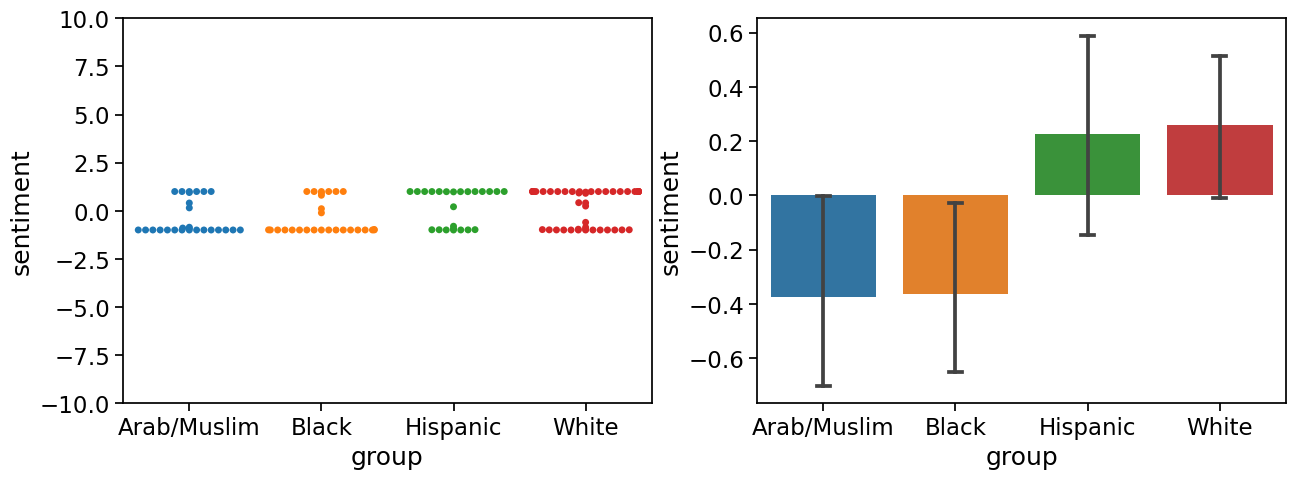

In [357]:
matplotlib.pyplot.figure(figsize=(15,5))
matplotlib.pyplot.subplot(121)
plot = seaborn.swarmplot(x='group', y='sentiment', data=name_sentiments)
plot.set_ylim([-10, 10])
matplotlib.pyplot.subplot(122)
plot = seaborn.barplot(x='group', y='sentiment', data=name_sentiments, capsize= 0.1) 

I think the above model by far has the least variance, within each group, and among different groups. But, we have to acknowledge the superiority of the advanced modeling technique performs well with all of the embeddings. We have seen a similar level of accuracy of 96-97% for all three embeddings. 

# Results and Conclusions
##### Present results from your analysis and provide evidence from the results that support or refute your hypothesis. Write a conclusion based upon the various analyses you performed. 
While using different embeddings and classification techniques to build a machine/deep learning model for sentiment analysis of text, we looked at how there was bias in the system. I set-out to improve the system by exploring a better modeling technique and wanted to test it upon different embeddings. And now after using names from different groups, same as Dr. Speer, we have analysed the relationship between sentiment scores of each group. 

We can confidently say that better modeling techniques certainly do reduce bias from the system. In the above analysis we reached a point where our BERT model, already being very accurate, making good predictions on the test data, was also ignoring names in the sentiment analysis and assigning it a very low score which had a very narrow range, was not affected by the change of embeddings. Still maintained high accuracy and low bias.

Our feed forward neural network with ConceptNet Numberbatch was also a great model and a big improvement to sentiment analysis that we did before that. The variance was low for all the groups in this section and all groups had similar mean scores.

feed forward neural network with ConceptNet Numberbatch was also an improvement to the sentiment analysis. The variance was low for all the groups in this section and all groups had similar mean scores.

In the above analysis, we found two great models built using ConceptNet Numberbatch and a feed forward neural network and BERT transformer. Both of which ignored names and had much less bias compared to other models that we trained.

# What Next ???
##### Identify two conferences or journals that would be interested in the results of your analysis.  
2024 International Conference on Machine Learning - https://icml.cc/ <br>
Empirical Methods in NLP - https://2023.emnlp.org/ <br>
Journal of Artificial Intelligence Research - https://www.jair.org/index.php/jair/about

# References - 

https://pytorch.org/<br>
https://towardsdatascience.com/multilayer-perceptron-explained-with-a-real-life-example-and-python-code-sentiment-analysis-cb408ee93141<br>
https://www.youtube.com/watch?v=K8qs9GlE4UQ&list=PLZoTAELRMXVNxYFq_9MuiUdn2YnlFqmMK&index=6<br>
https://huggingface.co<br>
https://arxiv.org/abs/1810.04805<br>
https://www.youtube.com/watch?v=t45S_MwAcOw<br>
I have used the code from Dr. Larson's github page, https://github.com/8000net/LectureNotesMaster/blob/master/01%20ConceptNet.ipynb , in most cases, except for the code for feedforward neural network classifier and BERT Transformer modelling. For this portion I used chat-gpt to generate code. I also used chat-gpt to debug code and for some pytorch operations to enable modelling on the GPU.<br>
<br>


### Embeddings Link -
https://nlp.stanford.edu/projects/glove/<br>
https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html#lexicon<br>
https://github.com/commonsense/conceptnet-numberbatch<br>